# Introducció:
__Volem plantejar com podria ser un hipotètic cas real de projecte de mineria de dades. Tot parteix d'una presentació del client que exposa un problema de negoci difús i molt genèric que haureu de reconduir com a projecte de mineria de dades. Heu treballat un cicle de vida de projecte que ara té que ser el pal de paller de les respostes.
Transformeu els objectius de negoci en objectius de mineria de dades.
Prepareu una estratègia. Cal aplicar com a mínim dos tipus d'algorismes de MD vistos al semestre. Per tant, com a mínim tindreu dos objectius de MD.
Analitzeu bé les dades, enteneu el model que representen les dades.
Preparació de dades, neteja, creació del model, avaluació de la qualitat, interpretació i proposta de què es pot fer amb el coneixement extret.
Orienteu la pràctica com podria ser la presentació de resultats que li faríeu al client. Per tant llenguatge clar i ordenat.
Les dades. Estan en fitxers csv. Hi ha un script de SQL que us pot ajudar a entendre la tipologia de les dades i les seves relacions. Si no queda clar pregunteu al Fòrum.
Per preparar les dades creativitat i llibertat absoluta: R, Excel, Acces, Mysql... El que vulgueu. Treballeu en les eines que sigueu més eficients i productius.  Si us perdeu o quedeu aturats en algun punt  no dubteu en contactar amb mi.__

# Presentació del client:
__Hola, em dic Joan Schlemmer. Sóc CEO a la cadena de botigues presencials Gourmet. Ens dediquem al negoci de l'alimentació i beguda de qualitat. Tenim presència en botigues a Europa i Estats Units.
El negoci no ens va malament però m'agradaria poder augmentar la facturació de l'empresa. No tinc clar si augmentant les vendes o reduint despeses... L'altre dia jugant al golf amb un company que es dedica al negoci de les comunicacions en va comentar que havia engegat un projecte de... Big Data o Mineria de Dades o no se que del coneixement... No ho tinc clar...  Em va dir que li varen aconsellar accions concretes a partir de dades recollides del seu negoci i que està content... La qüestió és que us enviaran unes dades extretes del nostre ERP perquè em feu això de la mineria. Si us plau si teniu dubtes amb les dades pregunteu als nostres tècnics. Quan podré tenir un primer informe? D'aquí un mes? Perfecte...__


Tenim per davant una tasca interessant de Mineria de Dades. Un client ens proposa un problema de negoci molt difús i ens ofereix unes dades extrtes del deu ERP per intentar trobar alguna ajuda per prendre decissions. En concret, el client vol augmentar la facturació de l'empresa, però no té clar si fer-ho augmentant les vendes o reduint despeses. Per tant, enfocarem aquest projecte amb la intenció de poder contestar aquesta qüestió.

## Càrrega i anàlisi de les dades

### Taula TIENDA

El primer que hem de fer és estudiar les dades que ens ha proporcionat el client. Es tracta de 13 fitxers cvs i un script SQL. Anem a mirar primer el script SQL. Com que el script és molt llarg, el que faré serà visualitzar a poc a poc la informació que ofereix. Anem a veure la primera secció del script:

```
CREATE TABLE GOURMET.TIENDA  (
                  NOMBRE CHAR(100) NOT NULL ,
                  DIRECCION CHAR(100) NOT NULL ,
                  SUPERFICIE DECIMAL(5,2) NOT NULL ,
                  FORMATO_TIENDA CHAR(100) NOT NULL ,
                  PAIS CHAR(100) NOT NULL ,
                  TIPO_ZONA CHAR(100) NOT NULL )
                 IN USERSPACE1 ;

import from tienda.cvs
of del modified by CHARDEL""  COLDEL, DECPT.
insert into gourmet.tienda;

-- DDL Statements for primary key on Table GOURMET.TIENDA

ALTER TABLE GOURMET.TIENDA
        ADD CONSTRAINT CC1187120357877 PRIMARY KEY
                (NOMBRE);
```

El que fa aquest codi és crear la taula __TIENDA__ en una base de dades __GOURMET__. Defineix els diferents atributs, carrega les dades des del fitxer *tienda.cvs* i fa que la clau primària de la taula sigui l'atribut __NOMBRE__. Anem a carregar les dades del fitxer *tienda.cvs*, per veure quin aspecte tenen. Primer, però, les visualitzo amb l'editor Notepad++ i veig que es tracta de files de dades separades per coma i sense capçalera. Per començar, especifico la ruta al directori de treball. A continuació carrego el fitxer *tienda.cvs* a l’entorn de R, en un dataframe amb nom *gourmet.tienda*. A més, aprofito la informació que ens dona el script en SQL per nombrar els atributs. Comprovo que s’ha carregat correctament amb la funció head(), que mostra en consola les primeres files del fitxer.

In [1]:
setwd("C:/Users/Lluís/Documents/UOC/Màster en Data Science/Mineria de Dades/Practica/")
tienda_header <- c("NOMBRE", "DIRECCION", "SUPERFICIE", "FORMATO_TIENDA", "PAIS", "TIPO_ZONA")
gourmet.tienda <- read.csv(file="gourmetdb/tienda.cvs", header=FALSE, sep=",")
names(gourmet.tienda) <- tienda_header
head(gourmet.tienda)

NOMBRE,DIRECCION,SUPERFICIE,FORMATO_TIENDA,PAIS,TIPO_ZONA
Barcelona,"Castellets, 119",223,Centro comercial,EspaÃ±a,XRTX
Florencia,"Venize, 56",275,Tienda de barrio,Italia,XRTS
Fort Lauderdale,"23, Vyn Ness Street",135,Centro comercial,Estados Unidos,BRTX
Liverpool,"23, Kingstown Road",80,Tienda de barrio,Reino Unido,BRXS
Londres I,"78, Westland Street",114,GalerÃ­a,Reino Unido,BRTX
Londres II,"198, SouthCastle Street",195,Centro comercial,Reino Unido,BRXX


Les dades s'han carregat i se lis ha afegit els encapçalaments, però veiem que certs caracters no es codifiquen bé. Per tant, vaig a repetir la lectura del fitxer però especificant la codificació.

In [2]:
gourmet.tienda <- read.csv(file="gourmetdb/tienda.cvs", header=FALSE, sep=",", fileEncoding = "UTF-8")
names(gourmet.tienda) <- tienda_header
head(gourmet.tienda)

NOMBRE,DIRECCION,SUPERFICIE,FORMATO_TIENDA,PAIS,TIPO_ZONA
Barcelona,"Castellets, 119",223,Centro comercial,España,XRTX
Florencia,"Venize, 56",275,Tienda de barrio,Italia,XRTS
Fort Lauderdale,"23, Vyn Ness Street",135,Centro comercial,Estados Unidos,BRTX
Liverpool,"23, Kingstown Road",80,Tienda de barrio,Reino Unido,BRXS
Londres I,"78, Westland Street",114,Galería,Reino Unido,BRTX
Londres II,"198, SouthCastle Street",195,Centro comercial,Reino Unido,BRXX


Ara sí que es veuen bé les dades. Passem a mirar les dimensions del dataframe.

In [3]:
dim(gourmet.tienda)

[1] 15  6

Es tracta d'un dataframe de 15 files de dades i 6 atributs. Anem a veure ara la distribució de les variables, amb la funció *summary()*.

In [4]:
summary(gourmet.tienda)

              NOMBRE                     DIRECCION   SUPERFICIE   
 Barcelona       :1   198, SouthCastle Street :1   Min.   : 75.0  
 Florencia       :1   23, Kingstown Road      :1   1st Qu.:107.0  
 Fort Lauderdale :1   23, Vyn Ness Street     :1   Median :170.0  
 Liverpool       :1   55, 22nd Street         :1   Mean   :163.8  
 Londres I       :1   560, Collins Av         :1   3rd Qu.:207.5  
 Londres II      :1   67, 51st Street         :1   Max.   :275.0  
 (Other)         :9   (Other)                 :9                  
          FORMATO_TIENDA             PAIS     TIPO_ZONA
 Centro comercial:4      Alemania      :1   BRXX   :3  
 Galería         :5      España        :2   BXTX   :3  
 Tienda de barrio:6      Estados Unidos:4   BRTX   :2  
                         Francia       :2   XRTX   :2  
                         Italia        :3   XRXX   :2  
                         Reino Unido   :3   BRXS   :1  
                                            (Other):2  

Anem a mirar la següent secció del script SQL.

### Taula PAIS

```
CREATE TABLE GOURMET.PAIS  (
                  NOMBREPAIS CHAR(100) NOT NULL ,
                  EXTENSION DECIMAL(10,0) NOT NULL ,
                  POBLACION DECIMAL(10,0) NOT NULL ,
                  NOMBREREGION CHAR(100) NOT NULL )
                 IN USERSPACE1 ;

import from pais.cvs
of del modified by CHARDEL""  COLDEL, DECPT.
insert into gourmet.pais;

-- DDL Statements for primary key on Table GOURMET.PAIS

ALTER TABLE GOURMET.PAIS
        ADD CONSTRAINT CC1186736972792 PRIMARY KEY
                (NOMBREPAIS);
```

Aquest codi crea la taula __PAIS__ a la base de dades __GOURMET__. Defineix els diferents atributs, carrega les dades des del fitxer *pais.cvs* i fa que la clau primària de la taula sigui l'atribut __NOMBREPAIS__. Ara seria convenient carregar les dades del fitxer csv, afegint-hi l'encapçalament, mirar les primeres files, les dimensions i el sumari, però com que això ho acabarem fent per tots els fitxers csv que tenim considero adient crear una funció que realitzi totes aquestes tasques. La funció rebá com arguments el nom del fitxer csv i una llista amb el nom dels atributs.

In [5]:
read_and_show_data <- function(name, col_names){
    path <- paste("gourmetdb/", name, sep = "", collapse = "")
    df <- read.csv(file=path, header=FALSE, sep=",", fileEncoding = "UTF-8")
    names(df) <- col_names
    print(paste("Visualitzem informació del dataframe", name))
    cat("\n")
    print(head(df))
    cat("\n")
    print(dim(df))
    cat("\n")
    print(summary(df))
    return(df)
}

Creem la llista corresponent amb els noms dels atributs i apliquem la funció al fitxer *pais.cvs*.

In [6]:
pais_header <- c("NOMBREPAIS", "EXTENSION", "POBLACION", "NOMBREREGION")
gourmet.pais <- read_and_show_data("pais.cvs", pais_header)

[1] "Visualitzem informació del dataframe pais.cvs"

      NOMBREPAIS EXTENSION POBLACION NOMBREREGION
1         Italia    301230  58384321   Sur Europa
2 Estados Unidos   9372610 266504935 Norteamérica
3         España    504750  39510740   Sur Europa
4       Francia     547030  58376462 Norte Europa
5       Alemania    356910  81549019 Norte Europa
6   Reino Unido     244820  58452516 Norte Europa

[1] 16  4

      NOMBREPAIS   EXTENSION         POBLACION                 NOMBREREGION
 Alemania  : 1   Min.   :  30510   Min.   :  3562164   Latinoamérica :1    
 Argentina : 1   1st Qu.:  63478   1st Qu.:  9722349   Norte Europa  :9    
 Australia : 1   Median : 403437   Median : 31708936   Norteamérica  :3    
 Bélgica   : 1   Mean   :2150139   Mean   : 49418835   Oceanía       :1    
 Canadá    : 1   3rd Qu.:2171135   3rd Qu.: 58401370   Sur Europa    :2    
 Dinamarca : 1   Max.   :9976140   Max.   :266504935                       
 (Other)   :10                                       

Per tal de carregar i estudiar la resta de les dades, el que farem ara serà fer el mateix per a la resta de fitxers csv que tenim. Per tant, repetirem per a cada fitxer el procés de visualitzar la secció corresponent al script SQL, extreure manualment els noms dels atributs i crear una llista amb ells, i aplicar la funció que acabem de crear per tal de carregar les dades en un dataframe i  mostrar informació interessant.

### Taula REGIONGEOGRAFICA

```
CREATE TABLE GOURMET.REGIONGEOGRAFICA  (
                  NOMBREREGION CHAR(100) NOT NULL ,
                  CONTINENTE CHAR(100) NOT NULL )
                 IN USERSPACE1 ;

import from regiongeografica.cvs
of del modified by CHARDEL""  COLDEL, DECPT.
insert into gourmet.regiongeografica;

ALTER TABLE GOURMET.REGIONGEOGRAFICA
        ADD CONSTRAINT CC1186758129270 PRIMARY KEY
                (NOMBREREGION);
```

In [7]:
region_header <- c("NOMBREREGION", "CONTINENTE")
gourmet.region <- read_and_show_data("regiongeografica.cvs", region_header)

[1] "Visualitzem informació del dataframe regiongeografica.cvs"

    NOMBREREGION CONTINENTE
1   Norteamérica   América 
2 Latinoamérica    América 
3   Norte Europa     Europa
4     Sur Europa     Europa
5       Oceanía    Oceanía 

[1] 5 2

         NOMBREREGION    CONTINENTE
 Latinoamérica :1     América :2   
 Norte Europa  :1     Europa  :2   
 Norteamérica  :1     Oceanía :1   
 Oceanía       :1                  
 Sur Europa    :1                  


### Taula CLIENTE

```
CREATE TABLE GOURMET.CLIENTE  (
                  CODCLIENTE CHAR(10) NOT NULL ,
                  NOMBRECLIENTE CHAR(100) ,
                  SEXO CHAR(25) ,
                  FECHANACIMIENTO DATE ,
                  ESTADOCIVIL CHAR(25) ,
                  DIRECCIÓN CHAR(100) ,
                  PROFESIÓN CHAR(100) ,
                  NUMEROHIJOS INTEGER ,
                  REGION CHAR(100) ,
                  NACIONALIDAD CHAR(100) ,
                  TOTALCOMPRAS INTEGER ,
                  PUNTOSACUMULADOS INTEGER )
                 IN USERSPACE1 ;

import from cliente.cvs
of del modified by CHARDEL""  COLDEL, DECPT.
insert into gourmet.cliente;

-- DDL Statements for primary key on Table GOURMET.CLIENTE

ALTER TABLE GOURMET.CLIENTE
        ADD CONSTRAINT CC1186758966594 PRIMARY KEY
                (CODCLIENTE);
```

In [8]:
cliente_header <- c("CODCLIENTE", "NOMBRECLIENTE", "SEXO", "FECHANACIMIENTO", "ESTADOCIVIL", "DIRECCION", 
                    "PROFESION", "NUMEROHIJOS", "REGION", "NACIONALIDAD", "TOTALCOMPRAS", "PUNTOSACUMULADOS")
gourmet.cliente <- read_and_show_data("cliente.cvs", cliente_header)

[1] "Visualitzem informació del dataframe cliente.cvs"

  CODCLIENTE          NOMBRECLIENTE    SEXO FECHANACIMIENTO ESTADOCIVIL
1   0000001R Roca Sacristán Narciso Hombre         19551220   Soltero/a
2   0065536F Fuentes Mohedano Rosa    Mujer        19420108   Casado/a 
3   0065537P       Prat Salom Pedro Hombre         19400315   Casado/a 
4   0000002J         Jones Nicholas Hombre         19110808   Soltero/a
5   0000003B       Burton Alexander Hombre         19420417   Casado/a 
6   0065538S         Sales Deborah    Mujer        19410526   Casado/a 
                                 DIRECCION
1 Piazzale Suppercortemaggiore 4 , Milano 
2               C/ Niza 73 08032 Barcelona
3       corso Vittorio Emanuele, 102 Roma 
4     1 Place de la Sorbonne , 75003 Paris
5   46 Stockwell Place ,Liverpool L69 2DH 
6               Leopoldstraße 44, München 
                               PROFESION NUMEROHIJOS       REGION NACIONALIDAD
1 Economistas,Abogados & Admin.Empresas            0   Sur E

### Taula PRODUCTO

```
CREATE TABLE GOURMET.PRODUCTO  (
                  CODPRODUCTO CHAR(25) NOT NULL ,
                  DESCRIPCIÓN CHAR(100) NOT NULL ,
                  NOMBREPAIS CHAR(100) NOT NULL ,
                  COSTE DECIMAL(5,2) NOT NULL ,
                  PRECIOVENTA DECIMAL(5,2) NOT NULL ,
                  TIPOUNIDAD CHAR(100) NOT NULL ,
                  NOMBRESUBFAMILIA CHAR(100) NOT NULL ,
                  MARCA CHAR(100) NOT NULL ,
                  CODPROVEEDOR CHAR(10) NOT NULL )
                 IN USERSPACE1 ;

import from producto.cvs
of del modified by CHARDEL""  COLDEL, DECPT.
insert into gourmet.producto;

-- DDL Statements for primary key on Table GOURMET.PRODUCTO

ALTER TABLE GOURMET.PRODUCTO
        ADD CONSTRAINT CC1187115240218 PRIMARY KEY
                (CODPRODUCTO);

```

In [9]:
producto_header <- c("CODPRODUCTO", "DESCRIPCION", "NOMBREPAIS", "COSTE", "PRECIOVENTA", "TIPOUNIDAD", 
                    "NOMBRESUBFAMILIA", "MARCA", "CODPROVEEDOR")
gourmet.producto <- read_and_show_data("producto.cvs", producto_header)

[1] "Visualitzem informació del dataframe producto.cvs"

  CODPRODUCTO          DESCRIPCION   NOMBREPAIS COSTE PRECIOVENTA
1       001CH             Chesire  Reino Unido   3.30        4.69
2       002CO             Cotswold Reino Unido   3.47        4.98
3       003CL Crumbly Lancanshire  Reino Unido   3.93        5.59
4       004DG   Double Gloucester  Reino Unido   3.48        4.98
5       005HU             Huntsman Reino Unido   4.83        6.84
6       006MB Mature Blue Stilton  Reino Unido   5.08        7.13
        TIPOUNIDAD   NOMBRESUBFAMILIA          MARCA CODPROVEEDOR
1 Porción (250 g)        Vaca Curado    Smith Farmer          101
2 Porción (250 g)        Vaca Curado        Old Hill          101
3 Porción (250 g)    Vaca Semicurado  The Farmhouse           101
4 Porción (250 g)        Vaca Curado      Mr. Cooper          101
5 Porción (250 g)  Vaca Pasta veteada     Thoncheese          101
6 Porción (250 g)  Vaca Pasta veteada       Blue Cow          101

[1] 339   9

  COD

### Taula PROVEEDOR

```
CREATE TABLE GOURMET.PROVEEDOR  (
                  CODPROVEEDOR CHAR(10) NOT NULL ,
                  NOMBREPROVEEDOR CHAR(100) NOT NULL ,
                  PERSONACONTACTO CHAR(100) NOT NULL ,
                  DIRECCIÓN CHAR(100) NOT NULL ,
                  TELÉFONO CHAR(25) NOT NULL ,
                  PERIODOPAGO SMALLINT ,
                  PAGOPENDIENTE DECIMAL(5,2) ,
                  TIPOPROVEEDOR CHAR(100) ,
                  ALCANCE CHAR(25) NOT NULL )
                 IN USERSPACE1 ;

import from proveedor.cvs
of del modified by CHARDEL""  COLDEL, DECPT.
insert into gourmet.proveedor;

-- DDL Statements for primary key on Table GOURMET.PROVEEDOR

ALTER TABLE GOURMET.PROVEEDOR
        ADD CONSTRAINT CC1187115755870 PRIMARY KEY
                (CODPROVEEDOR);
```

In [10]:
proveedor_header <- c("CODPROVEEDOR", "NOMBREPROVEEDOR", "PERSONACONTACTO", "DIRECCION", "TELEFONO", "PERIODOPAGO", 
                    "PAGOPENDIENTE", "TIPOPROVEEDOR", "ALCANCE")
gourmet.proveedor <- read_and_show_data("proveedor.cvs", proveedor_header)

[1] "Visualitzem informació del dataframe proveedor.cvs"

  CODPROVEEDOR                  NOMBREPROVEEDOR      PERSONACONTACTO
1          101           The Farmhouse Company        Richard Addams
2          102 Cooperative de Produits Laitiers Jean François Duval 
3          103               Compagnie Laitier    Florence Deveroix 
4          104             Compagnie du Fromage     Jacques Decruel 
5          105               The Holland House        Mark Vanderlok
6          106 Cooperativa Agricola il Poggiolo   Andrea Cavaglieri 
                                           DIRECCION TELEFONO PERIODOPAGO
1                     122 Brackenbury Rd.,London SW3 76589900          60
2             34 Rue de Raspail , Brussels, Belgium  90090011          60
3         96 Rue Vauvilliers  , 75003 Paris, France  79034678          60
4 15 Boulevard Bonne Nouvelle , 76003 Paris, France  56341390          90
5           Leidsekade 97 1017 PN Amsterdam, Holland 45562389          60
6   SS 503 Km. 

### Taula NOMBRESUBFAMILIA

```
CREATE TABLE GOURMET.NOMBRESUBFAMILIA  (
                  NOMBRESUBFAMILIA CHAR(100) NOT NULL ,
                  DESCRIPCIÓN CHAR(100) ,
                  NOMBREFAMILIA CHAR(100) NOT NULL )
                 IN USERSPACE1 ;

import from subfamilia.cvs
of del modified by CHARDEL""  COLDEL, DECPT.
insert into gourmet.nombresubfamilia;

-- DDL Statements for primary key on Table GOURMET.NOMBRESUBFAMILIA

ALTER TABLE GOURMET.NOMBRESUBFAMILIA
        ADD CONSTRAINT CC1187116579834 PRIMARY KEY
                (NOMBRESUBFAMILIA);
```

In [11]:
nombresubfamilia_header <- c("NOMBRESUBFAMILIA", "DESCRIPCION", "NOMBREFAMILIA")
gourmet.nombresubfamilia <- read_and_show_data("subfamilia.cvs", nombresubfamilia_header)

[1] "Visualitzem informació del dataframe subfamilia.cvs"

      NOMBRESUBFAMILIA DESCRIPCION NOMBREFAMILIA
1     D.O. Rioja-Tinto                D.O. Rioja
2   D.O. Rioja-Blanco                 D.O. Rioja
3   D.O. Rioja-Rosado                 D.O. Rioja
4   D.O. Penedés-Tinto              D.O. Penedés
5 D.O. Penedés-Blanco               D.O. Penedés
6 D.O. Penedés-Rosado               D.O. Penedés

[1] 115   3

             NOMBRESUBFAMILIA             DESCRIPCION    NOMBREFAMILIA
 Bizcochos           :  1                       :80   Búfala    : 7   
 Bollería            :  1     Textura del queso :35   Cabra     : 7   
 Búfala Añejo        :  1                             D.O. Cava : 7   
 Búfala Curado       :  1                             Mixto     : 7   
 Búfala Fresco       :  1                             Oveja     : 7   
 Búfala Pasta blanda :  1                             Vaca      : 7   
 (Other)             :109                             (Other)   :73   


### Taula FAMILIA

```
CREATE TABLE GOURMET.FAMILIA  (
                  NOMBREFAMILIA CHAR(100) NOT NULL ,
                  DESCRIPCIÓN CHAR(100) ,
                  NOMBRESECCIÓN CHAR(100) NOT NULL )
                 IN USERSPACE1 ;

import from familia.cvs
of del modified by CHARDEL""  COLDEL, DECPT.
insert into gourmet.familia;

-- DDL Statements for primary key on Table GOURMET.FAMILIA

ALTER TABLE GOURMET.FAMILIA
        ADD CONSTRAINT CC1187116923569 PRIMARY KEY
                (NOMBREFAMILIA);
```

In [12]:
familia_header <- c("NOMBREFAMILIA", "DESCRIPCION", "NOMBRESECCION")
gourmet.familia <- read_and_show_data("familia.cvs", familia_header)

[1] "Visualitzem informació del dataframe familia.cvs"

           NOMBREFAMILIA DESCRIPCION NOMBRESECCION
1             D.O. Rioja                    Vinos 
2           D.O. Penedés                    Vinos 
3 D.O. Ribera del Duero                     Vinos 
4         D.O. Somontano                    Vinos 
5         D.O. Priorato                     Vinos 
6             D.O. Pfalz                    Vinos 

[1] 28  3

              NOMBREFAMILIA         DESCRIPCION    NOMBRESECCION
 Búfala              : 1                  :23   Espumosos : 2   
 Cabra               : 1    Tipo de leche : 5   Licores   : 1   
 D.O. Alsace         : 1                        Postres   : 2   
 D.O. Barossa Valley : 1                        Quesos    : 5   
 D.O. Beaujolais     : 1                        Vinos     :18   
 D.O. Bordeaux       : 1                                        
 (Other)             :22                                        


### Taula SECCION

```
CREATE TABLE GOURMET.SECCION  (
                  NOMBRESECCIÓN CHAR(100) NOT NULL ,
                  DESCRIPCIÓN CHAR(100) )
                 IN USERSPACE1 ;

import from seccion.cvs
of del modified by CHARDEL""  COLDEL, DECPT.
insert into gourmet.seccion;

-- DDL Statements for primary key on Table GOURMET.SECCION

ALTER TABLE GOURMET.SECCION
        ADD CONSTRAINT CC1187117338345 PRIMARY KEY
                (NOMBRESECCIÓN);
```

In [13]:
seccion_header <- c("NOMBRESECCION", "DESCRIPCION")
gourmet.seccion <- read_and_show_data("seccion.cvs", seccion_header)

[1] "Visualitzem informació del dataframe seccion.cvs"

  NOMBRESECCION DESCRIPCION
1        Vinos           NA
2    Espumosos           NA
3      Licores           NA
4        Quesos          NA
5      Postres           NA

[1] 5 2

    NOMBRESECCION DESCRIPCION   
 Espumosos :1     Mode:logical  
 Licores   :1     NA's:5        
 Postres   :1                   
 Quesos    :1                   
 Vinos     :1                   


### Taula CABECERATICKET

```
CREATE TABLE GOURMET.CABECERATICKET  (
                  CODVENTA CHAR(25) NOT NULL ,
                  NOMBRETIENDA CHAR(100) NOT NULL ,
                  FECHA DATE NOT NULL ,
                  HORA SMALLINT NOT NULL ,
                  FORMAPAGO CHAR(100) NOT NULL ,
                  CODCLIENTE CHAR(25) ,
                  IMPORTETOTAL DECIMAL(8,4) NOT NULL ,
                  TOTALUNIDADES SMALLINT NOT NULL ,
                  PUNTOSTICKET SMALLINT NOT NULL )
                 IN USERSPACE1 ;

import from cabeceraticket.cvs
of del modified by CHARDEL""  COLDEL, DECPT.
insert into gourmet.cabeceraticket;

-- DDL Statements for primary key on Table GOURMET.CABECERATICKET

ALTER TABLE GOURMET.CABECERATICKET
        ADD CONSTRAINT CC1187118498213 PRIMARY KEY
                (CODVENTA);
```

In [14]:
cabeceraticket_header <- c("CODVENTA", "NOMBRETIENDA", "FECHA", "HORA", "FORMAPAGO", "CODCLIENTE"
                          , "IMPORTETOTAL", "TOTALUNIDADES", "PUNTOSTICKET")
gourmet.cabeceraticket <- read_and_show_data("cabeceraticket.cvs", cabeceraticket_header)

[1] "Visualitzem informació del dataframe cabeceraticket.cvs"

   CODVENTA NOMBRETIENDA    FECHA HORA          FORMAPAGO CODCLIENTE
1 P20000000     París II 20000918   16 Tarjeta de Crédito           
2 P20000001     París II 20000908   17           Efectivo           
3 P20065536     París II 20000915   13 Tarjeta de Crédito           
4 P20065537     París II 20000915   14 Tarjeta de Crédito           
5 P20000002     París II 20000902   10             Cheque           
6 P20000003     París II 20001013   11             Cheque           
  IMPORTETOTAL TOTALUNIDADES PUNTOSTICKET
1      33.1875             3            0
2      61.9400             2            1
3      26.9175             2            0
4      22.9500             3            0
5     106.8200             6            1
6      49.1300             6            0

[1] 74327     9

      CODVENTA           NOMBRETIENDA       FECHA            HORA      
 BA0000000:    1   Londres I   :10652   Min.   :2e+07   Min.   : 9.00 

### Taula LINEASTICKET

```
CREATE TABLE GOURMET.LINEASTICKET  (
                  CODLINEA SMALLINT NOT NULL ,
                  CODVENTA CHAR(25) NOT NULL ,
                  NOMBRETIENDA CHAR(100) NOT NULL ,
                  CODPRODUCTO CHAR(100) NOT NULL ,
                  CANTIDAD SMALLINT NOT NULL ,
                  PRECIOVENTA DECIMAL(8,4) NOT NULL ,
                  NOMBREPROMOCION CHAR(100) ,
                  CODCABECERA INTEGER NOT NULL )
                 IN USERSPACE1 ;

import from lineasticket.cvs
of del modified by CHARDEL""  COLDEL, DECPT. COMMITCOUNT 500
insert into gourmet.lineasticket;
```

In [15]:
lineasticket_header <- c("CODLINEA", "CODVENTA", "NOMBRETIENDA", "CODPRODUCTO", "CANTIDAD", "PRECIOVENTA"
                          , "NOMBREPROMOCION", "CODCABECERA")
gourmet.lineasticket <- read_and_show_data("lineasticket.cvs", lineasticket_header)

[1] "Visualitzem informació del dataframe lineasticket.cvs"

  CODLINEA  CODVENTA NOMBRETIENDA CODPRODUCTO CANTIDAD PRECIOVENTA
1        1 RO0196608         Roma      123CB         1       3.990
2        1 RO0196609         Roma      267BP         1       8.800
3        2 RO0065539         Roma      079MA         1       4.975
4        3 RO0065539         Roma      158TR         2      11.450
5        4 RO0065539         Roma      283BC         2      29.950
6        1 RO0131072         Roma      208ME         1      26.200
  NOMBREPROMOCION CODCABECERA
1                       13641
2                       13642
3                       13638
4                       13638
5                       13638
6                       13639

[1] 174671      8

    CODLINEA           CODVENTA            NOMBRETIENDA    CODPRODUCTO    
 Min.   : 1.000   M15505039:    15   Londres I   :29803   022CA  :  6409  
 1st Qu.: 1.000   M12031696:    14   Manhattan I :23642   125CT  :  6158  
 Median : 2.000

### Taula PROMOCION

```
CREATE TABLE GOURMET.PROMOCION  (
                  NOMBREPROMOCION CHAR(100) NOT NULL ,
                  TIPOPROMOCION CHAR(100) NOT NULL ,
                  COSTE SMALLINT ,
                  FECHAINICIO DATE NOT NULL ,
                  FECHAFIN DATE NOT NULL ,
                  CODPRODUCTO CHAR(25) NOT NULL ,
                  NOMBREFAMILIA CHAR(25) ,
                  NOMBRESECCIÓN CHAR(25) ,
                  NOMBRETIENDA CHAR(25) ,
                  NOMBREREGION CHAR(25) ,
                  NOMBREPAIS CHAR(25) )
                 IN USERSPACE1 ;

import from promocion.cvs
of del modified by CHARDEL""  COLDEL, DECPT.
insert into gourmet.promocion;

-- DDL Statements for primary key on Table GOURMET.PROMOCION

ALTER TABLE GOURMET.PROMOCION
        ADD CONSTRAINT CC1187123330592 PRIMARY KEY
                (NOMBREPROMOCION);
```

In [16]:
promocion_header <- c("NOMBREPROMOCION", "TIPOPROMOCION", "COSTE", "FECHAINICIO", "FECHAFIN", "CODPRODUCTO", 
                      "NOMBREFAMILIA", "NOMBRESECCIÓN", "NOMBRETIENDA", "NOMBREREGION", "NOMBREPAIS")
gourmet.promocion <- read_and_show_data("promocion.cvs", promocion_header)

[1] "Visualitzem informació del dataframe promocion.cvs"

           NOMBREPROMOCION TIPOPROMOCION COSTE FECHAINICIO FECHAFIN CODPRODUCTO
1             Semillon 5%   Descuento 5%    NA    20000901 20000930       295GS
2     Merlot Introduction           3x2     NA    20001001 20001031       308ME
3         Mahon-Chardonnay      Cruzada     NA    20001001 20001031       077MA
4 Carquiñolis-GranReserva       Cruzada     NA    20001101 20001130       108CA
5     Chocolate-Champagne       Cruzada     NA    20001101 20001130       123CB
  NOMBREFAMILIA NOMBRESECCIÓN NOMBRETIENDA NOMBREREGION NOMBREPAIS
1            NA            NA                        NA         NA
2            NA            NA                        NA         NA
3            NA            NA  Manhattan I           NA         NA
4            NA            NA    Barcelona           NA         NA
5            NA            NA    Londres I           NA         NA

[1]  5 11

                 NOMBREPROMOCION      TIPOPROMOC

### Taula PEDIDO

```
CREATE TABLE GOURMET.PEDIDO  (
                  CODPEDIDO CHAR(25) NOT NULL ,
                  NOMBRETIENDA CHAR(25) NOT NULL ,
                  CODPRODUCTO CHAR(25) NOT NULL ,
                  PRECIOCOMPRA DECIMAL(8,4) NOT NULL ,
                  CANTIDADSOLICITADA SMALLINT NOT NULL ,
                  FECHASOLICITUD DATE NOT NULL ,
                  CANTIDADENTREGADA SMALLINT NOT NULL ,
                  FECHAENTREGA DATE NOT NULL )
                 IN USERSPACE1 ;

import from pedido.cvs
of del modified by CHARDEL""  COLDEL, DECPT.
insert into gourmet.pedido;

-- DDL Statements for primary key on Table GOURMET.PEDIDO

ALTER TABLE GOURMET.PEDIDO
        ADD CONSTRAINT CC1187124047993 PRIMARY KEY
                (CODPEDIDO);
```

In [17]:
pedido_header <- c("CODPEDIDO", "NOMBRETIENDA", "CODPRODUCTO", "PRECIOCOMPRA", "CANTIDADSOLICITADA", "FECHASOLICITUD", 
                      "CANTIDADENTREGADA", "FECHAENTREGA")
gourmet.pedido <- read_and_show_data("pedido.cvs", pedido_header)

[1] "Visualitzem informació del dataframe pedido.cvs"

  CODPEDIDO NOMBRETIENDA CODPRODUCTO PRECIOCOMPRA CANTIDADSOLICITADA
1     82207    Florencia       137TR        16.00                 12
2     70595        Milán       219SY        18.28                 12
3     93196  Miami Beach       335GB         9.31                 12
4     66160      París I       305CH        18.03                 12
5     55187        Roma        266BP         4.79                 12
6     35933  Manhattan I       166TR         5.08                 12
  FECHASOLICITUD CANTIDADENTREGADA FECHAENTREGA
1       20000801                12     20000821
2       20000801                12     20000821
3       20000801                12     20000821
4       20000801                12     20000821
5       20000801                12     20000821
6       20000801                12     20000821

[1] 8882    8

   CODPEDIDO          NOMBRETIENDA   CODPRODUCTO    PRECIOCOMPRA    
 Min.   :    4   Londres I  : 708   022CA

## Claus foranes

Un cop carregades totes les dades, de tal manera que les dades de cada taula de la base de dades s'han carregat en un dataframe diferent, seguim mirant quina altra informació conté el script SQL. El que ens trobem són diferents comandes que especifiquen les claus foranes de les taules de la base de dades. Per exemle, aquesta és la primera comanda:

```
-- DDL Statements for foreign keys on Table GOURMET.TIENDA

ALTER TABLE GOURMET.TIENDA
        ADD CONSTRAINT CC1186736993542 FOREIGN KEY
                (PAIS)
        REFERENCES GOURMET.PAIS
                (NOMBREPAIS)
        ON DELETE RESTRICT
        ON UPDATE RESTRICT
        ENFORCED
        ENABLE QUERY OPTIMIZATION;
```

El que ens diu això és que la taula __TIENDA__ té el seu atribut __PAIS__ que és una clau forana que referencia l'atribut __NOMBREPAIS__ de la taula __PAIS__. Si mirem la resta de comandes tenim la segúent llista de claus foranes:

- TIENDA > PAIS:                  PAIS > NOMBREPAIS
- PAIS > NOMBREREGION:            REGIONGEOGRAFICA > NOMBREREGION
- PRODUCTO > CODPROVEEDOR:        PROVEEDOR > CODPROVEEDOR
- PRODUCTO > NOMBRESUBFAMILIA:    NOMBRESUBFAMILIA > NOMBRESUBFAMILIA
- FAMILIA > NOMBRESUBSECCION:     SECCION > NOMBRESUBSECCION
- CABECERATICKET > NOMBRETIENDA:  TIENDA > NOMBRE
- CABECERATICKET > CODCLIENTE:    CLIENTE > CODCLIENTE
- LINEASTICKET > CODPRODUCTO:     PRODUCTO > CODPRODUCTO
- LINEASTICKET > CODVENTA:        CABECERATICKET > CODVENTA
- LINEASTICKET > NOMBREPROMOCION: PROMOCION > NOMBREPROMOCION
- PEDIDO > NOMBRETIENDA:          TIENDA > NOMBRE
- PEDIDO > CODPRODUCTO:           PRODUCTO > CODPRODUCTO


## Regles d'asociació

Veiem que l'empresa del client a vegades sol fer promocions. Les promocions són una bona eina per tal d'aconseguir més ventes. Podriem ajudar al client dissenyant un sistema predictiu basat en regles d'asociació. D'aquestes regles es pot treure un coneixement molt interessant. L'empresa del client podria emprar aquestes regles per detectar les comandes en les que hi "manquen" productes que es solen comprar junts amb els que hi ha a la comanda. Així, les botigues poden preveure, amb una alta probabilitat, que en la pròxima comanda el client inclourà aquests productes que ara hi manquen, i això les botigues ho poden aprofitar per oferir al client uns vals de descompte en aquests productes, que així poden fer d'esquer per propiciar pròximes comandes.

Per realitzar aquest sistema basat en regles d'asociació ens calen les dades de les ventes que es fan, amb informació de les comandes, els productes comprats i el client concret. Aquesta informació la tenim a la taula __LINEASTIQUET__, que nosaltres tenim al dataframe __gourmet.lineasticket__. Anem a tornar a veure la informació interessant d'aquest dataframe:

In [18]:
dim(gourmet.lineasticket)

[1] 174671      8

Aquest dataframe té 174.671 files amb 6 atributs. Passem a veure l'aspecte de les dades amb la funció *head()*:

In [19]:
head(gourmet.lineasticket)

CODLINEA,CODVENTA,NOMBRETIENDA,CODPRODUCTO,CANTIDAD,PRECIOVENTA,NOMBREPROMOCION,CODCABECERA
1,RO0196608,Roma,123CB,1,3.990,,13641
1,RO0196609,Roma,267BP,1,8.800,,13642
2,RO0065539,Roma,079MA,1,4.975,,13638
3,RO0065539,Roma,158TR,2,11.450,,13638
4,RO0065539,Roma,283BC,2,29.950,,13638
1,RO0131072,Roma,208ME,1,26.200,,13639


Mirem també el sumari estadístic de les dades, amb la funció *summary()*:

In [20]:
summary(gourmet.lineasticket)

    CODLINEA           CODVENTA            NOMBRETIENDA    CODPRODUCTO    
 Min.   : 1.000   M15505039:    15   Londres I   :29803   022CA  :  6409  
 1st Qu.: 1.000   M12031696:    14   Manhattan I :23642   125CT  :  6158  
 Median : 2.000   L13801129:    13   Londres II  :15367   122TI  :  5448  
 Mean   : 2.135   M12883623:    13   Milán       :14618   262BO  :  5060  
 3rd Qu.: 3.000   M13407976:    13   Munich      :13207   145TG  :  4922  
 Max.   :15.000   MB1048604:    13   París I     :12806   283BC  :  4752  
                  (Other)  :174590   (Other)     :65228   (Other):141922  
    CANTIDAD      PRECIOVENTA                      NOMBREPROMOCION  
 Min.   :1.000   Min.   :  0.000                           :172922  
 1st Qu.:1.000   1st Qu.:  5.725   Carquiñolis-GranReserva :     3  
 Median :1.000   Median :  9.588   Chocolate-Champagne     :   117  
 Mean   :1.329   Mean   : 14.454   Mahon-Chardonnay        :   109  
 3rd Qu.:1.000   3rd Qu.: 19.380   Merlot Introduction 

Al summary veiem que no hi ha atributs que mostrin valors NAs a les seves dades. Anem a veure certa informació sobre les dades que ens interessen: les vendes concretes que es fan, els codis de les capçaleres de les vendes, i els productes diferents que es venen. Els dos primers ens hauien de donar el mateix valor, ja que es tracta de dades que fan referència a la mateixa informació. Anem a veure-ho: 

In [21]:
num_sales <- dim(unique(subset(gourmet.lineasticket, select=c('CODVENTA'))))[1]
num_headers <- dim(unique(subset(gourmet.lineasticket, select=c('CODCABECERA'))))[1]
num_products <- dim(unique(subset(gourmet.lineasticket, select=c('CODPRODUCTO'))))[1]


num_sales
num_headers
num_products
num_headers

[1] 74327

[1] 74327

[1] 338

[1] 74327

Efectivament, veiem que la informació dels atributs __CODVENTA__ i __CODCABECERA__ és redundant. Tenim 74.327 ventes i 338 productes diferents. 

Ara volem una llista per cada factura o venta amb els ítems que la componen. Eliminem la resta d'atributs:

In [22]:
items_per_invoice <- split(x=gourmet.lineasticket[,"CODPRODUCTO"],f=gourmet.lineasticket$CODVENTA)

Ara anem a veure quin aspecte té aquesta llista:

In [23]:
head(items_per_invoice)

$BA0000000
[1] 216SG  321SW  030MI 
338 Levels: 001CH  002CO  003CL  004DG  005HU  006MB  007RL  008MC  ... 339CO 

$BA0000001
[1] 123CB  082QC  042GO 
338 Levels: 001CH  002CO  003CL  004DG  005HU  006MB  007RL  008MC  ... 339CO 

$BA0000002
[1] 176TR 
338 Levels: 001CH  002CO  003CL  004DG  005HU  006MB  007RL  008MC  ... 339CO 

$BA0000003
[1] 082QC 
338 Levels: 001CH  002CO  003CL  004DG  005HU  006MB  007RL  008MC  ... 339CO 

$BA0000004
[1] 312CB 
338 Levels: 001CH  002CO  003CL  004DG  005HU  006MB  007RL  008MC  ... 339CO 

$BA0000005
[1] 135TR 
338 Levels: 001CH  002CO  003CL  004DG  005HU  006MB  007RL  008MC  ... 339CO

Veiem que per cada factura es mostra una llista amb els ítems que conté. A continuació, si hi ha duplicats els eliminen, encara que per la pròpia natura de les dades és poc provable que hi pugui haver duplicats:

In [24]:
items_per_invoice <- lapply(items_per_invoice,unique)

El dataframe gourmetdb.cabeceraticket conté les dades dls tickets. Mirant el sumari del seu atribut __TOTALUNIDADES__ podem veure la estadística de les unitats que composen les ventes. 

In [25]:
summary(gourmet.cabeceraticket$TOTALUNIDADES)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   3.119   4.000  41.000 

Tenim que de mitjana hi ha algó més de 3 articles per ticket, amb un màxim de 41.

A continuació passem a binaritzar les dades. Per això, primer, cal carregar el paquet arules:

In [26]:
install.packages("arules", repos = "http://cran.us.r-project.org")

package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lluís\AppData\Local\Temp\RtmpKmgUyv\downloaded_packages


I ara carreguem aquest paquet:

In [27]:
library(arules)

Warning message:
"package 'arules' was built under R version 3.4.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.4.3"
Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



In [28]:
items_per_invoice <- as(items_per_invoice, "transactions")

In [29]:
items_per_invoice

transactions in sparse format with
 74327 transactions (rows) and
 338 items (columns)

Anem primer a explorar les dades abans de construir les regles. Mostrem un gràfic amb les freqüències dels 20 ítems més nombrosos:

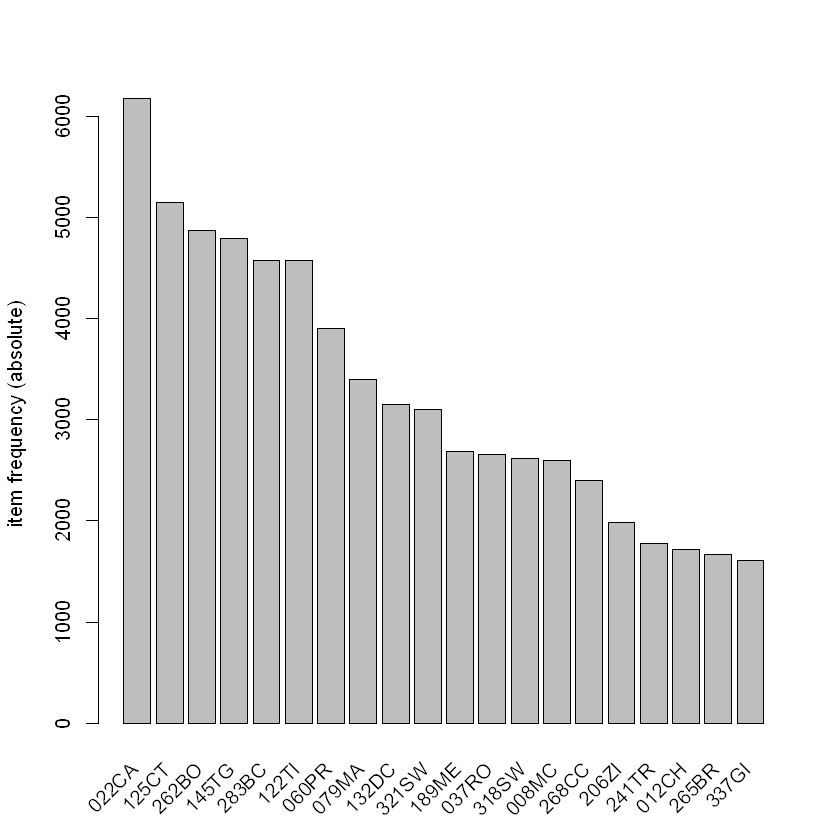

In [30]:
itemFrequencyPlot(items_per_invoice, topN=20, type="absolute")

A continuació anem a veure un sumari de les dades:

In [31]:
summary(items_per_invoice)

transactions as itemMatrix in sparse format with
 74327 rows (elements/itemsets/transactions) and
 338 columns (items) and a density of 0.00676998 

most frequent items:
 022CA   125CT   262BO   145TG   283BC  (Other) 
   6182    5156    4877    4791    4582  144491 

element (itemset/transaction) length distribution:
sizes
    1     2     3     4     5     6     7     8     9    10    11 
24952 23990 13534  6693  2819  1296   619   286   103    31     4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.288   3.000  11.000 

includes extended item information - examples:
  labels
1 001CH 
2 002CO 
3 003CL 

includes extended transaction information - examples:
  transactionID
1     BA0000000
2     BA0000001
3     BA0000002

Veiem que tenim 74.327 transactions i 338 columnes.

Ara ja podem passar a trobar les regles. Hem de passar uns valors mínims pel suport i la confiança. Provem amb un suport mínim de 0.01, és a dir, un 1%, i una confiança de 0.8, és a dir, del 80%:

In [32]:
retail_rules <- apriori(items_per_invoice, parameter = list(supp = 0.01, conf = 0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 743 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[338 item(s), 74327 transaction(s)] done [0.02s].
sorting and recoding items ... [47 item(s)] done [0.00s].
creating transaction tree ... done [0.05s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Ha trovat 0 regles. Anem, doncs, a relaxar una mica el suport, prenent un suport mínim del 0.1%:

In [33]:
retail_rules <- apriori(items_per_invoice, parameter = list(supp = 0.001, conf = 0.80))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 74 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[338 item(s), 74327 transaction(s)] done [0.01s].
sorting and recoding items ... [333 item(s)] done [0.01s].
creating transaction tree ... done [0.05s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [1 rule(s)] done [0.00s].
creating S4 object  ... done [0.02s].


obtenim només 1 regla. Aniré provant diferents valors menys restrictius pel suport i la confiança fins que obtingui un número de regles significatiu. 

In [34]:
retail_rules <- apriori(items_per_invoice, parameter = list(supp = 0.0001, conf = 0.6))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   1e-04      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[338 item(s), 74327 transaction(s)] done [0.03s].
sorting and recoding items ... [338 item(s)] done [0.00s].
creating transaction tree ... done [0.03s].
checking subsets of size 1 2 3 4 done [0.02s].
writing ... [92 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


Molt bé, amb un suport del 0.0001 i una confiança del 0.6 (0.01% i 60%, respectivament), hem obtingut 92 regles. Les regles no estan ordenades. Normalment voldrem veure les regles més relevants en primer lloc. Per exemple, considerem que volem veure primer les regles més probables. Això ho farem ordenant segons la confiança:

In [35]:
retail_rules<-sort(retail_rules, by="confidence", decreasing=TRUE)

Ara mostrem les 20 primeres regles:

In [36]:
inspect(retail_rules[1:20])

     lhs                       rhs      support      confidence lift      count
[1]  {011CH ,122TI ,206ZI } => {125CT } 0.0003094434 1.0000000   14.41563  23  
[2]  {122TI ,206ZI ,321SW } => {125CT } 0.0002287190 0.9444444   13.61476  17  
[3]  {037RO ,122TI ,206ZI } => {125CT } 0.0003901678 0.9354839   13.48559  29  
[4]  {122TI ,206ZI ,281BC } => {125CT } 0.0001614487 0.9230769   13.30674  12  
[5]  {122TI ,189ME ,206ZI } => {125CT } 0.0001614487 0.9230769   13.30674  12  
[6]  {060PR ,122TI ,206ZI } => {125CT } 0.0002690812 0.9090909   13.10512  20  
[7]  {122TI ,152TR ,206ZI } => {125CT } 0.0002556272 0.9047619   13.04271  19  
[8]  {122TI ,206ZI ,283BC } => {125CT } 0.0002287190 0.8947368   12.89820  17  
[9]  {030MI ,281BC }        => {312CB } 0.0001076325 0.8888889   49.45243   8  
[10] {122TI ,206ZI ,225CS } => {125CT } 0.0001076325 0.8888889   12.81390   8  
[11] {030MI ,262BO ,283BC } => {312CB } 0.0001076325 0.8888889   49.45243   8  
[12] {122TI ,206ZI ,262BO } => {125CT } 

Anem a veure el sumary estadístic de les regles obtingudes:

In [37]:
summary(retail_rules)

set of 92 rules

rule length distribution (lhs + rhs):sizes
 3  4 
48 44 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   3.000   3.000   3.478   4.000   4.000 

summary of quality measures:
    support            confidence          lift             count       
 Min.   :0.0001076   Min.   :0.6000   Min.   :  8.649   Min.   :  8.00  
 1st Qu.:0.0001211   1st Qu.:0.6316   1st Qu.:  9.328   1st Qu.:  9.00  
 Median :0.0001480   Median :0.6667   Median : 11.089   Median : 11.00  
 Mean   :0.0002299   Mean   :0.7198   Mean   : 19.668   Mean   : 17.09  
 3rd Qu.:0.0002287   3rd Qu.:0.8103   3rd Qu.: 14.048   3rd Qu.: 17.00  
 Max.   :0.0036057   Max.   :1.0000   Max.   :107.254   Max.   :268.00  

mining info:
              data ntransactions support confidence
 items_per_invoice         74327   1e-04        0.6

Veiem que la confiança va del 60% mínim que hem triat fins al 100%, amb una mitjana del 72%. El suport va del 0.01% fins al 0.36%, amb una mitjana del 0.02%.

En el nostre sisteme de regles d'associació ens apareixen les recomanacions amb els productes segons els seu codi, __CODPRODUCTO__, que pel sistema això ja està bé, però per un humà segurament serà més intuitiu veure la descripció del productes. Al dataframe __gourmet.lineasticket__ no existeix aquesta columna, però sí que existeix al dataframe __gourmet.producto__. El que podem fer és repetir tot el procés que hem fet però prenent com a base un dataframe que sigui el resiltat d'un JOIN d'ambdós dataframes a partir de l'atribut comú __CODPRODUCTO__. Com que hem modificat  __gourmet.lineasticket__, l'haurem de tornar a carregar. Anem a fer-ho:

In [38]:
lineasticket_header <- c("CODLINEA", "CODVENTA", "NOMBRETIENDA", "CODPRODUCTO", "CANTIDAD", "PRECIOVENTA"
                          , "NOMBREPROMOCION", "CODCABECERA")
gourmet.lineasticket <- read_and_show_data("lineasticket.cvs", lineasticket_header)

[1] "Visualitzem informació del dataframe lineasticket.cvs"

  CODLINEA  CODVENTA NOMBRETIENDA CODPRODUCTO CANTIDAD PRECIOVENTA
1        1 RO0196608         Roma      123CB         1       3.990
2        1 RO0196609         Roma      267BP         1       8.800
3        2 RO0065539         Roma      079MA         1       4.975
4        3 RO0065539         Roma      158TR         2      11.450
5        4 RO0065539         Roma      283BC         2      29.950
6        1 RO0131072         Roma      208ME         1      26.200
  NOMBREPROMOCION CODCABECERA
1                       13641
2                       13642
3                       13638
4                       13638
5                       13638
6                       13639

[1] 174671      8

    CODLINEA           CODVENTA            NOMBRETIENDA    CODPRODUCTO    
 Min.   : 1.000   M15505039:    15   Londres I   :29803   022CA  :  6409  
 1st Qu.: 1.000   M12031696:    14   Manhattan I :23642   125CT  :  6158  
 Median : 2.000

In [39]:
new_lineasticket <- merge(gourmet.lineasticket, gourmet.producto, by="CODPRODUCTO", all = TRUE)

In [40]:
head(new_lineasticket)

CODPRODUCTO,CODLINEA,CODVENTA,NOMBRETIENDA,CANTIDAD,PRECIOVENTA.x,NOMBREPROMOCION,CODCABECERA,DESCRIPCION,NOMBREPAIS,COSTE,PRECIOVENTA.y,TIPOUNIDAD,NOMBRESUBFAMILIA,MARCA,CODPROVEEDOR
001CH,1,MB0196612,Miami Beach,1,4.6875,,13910,NA,NA,NA,NA,NA,NA,NA,NA
001CH,1,BA0262147,Barcelona,2,4.6875,,13986,NA,NA,NA,NA,NA,NA,NA,NA
001CH,1,L10786432,Londres I,1,4.6875,,14527,NA,NA,NA,NA,NA,NA,NA,NA
001CH,1,MB0393231,Miami Beach,2,4.6875,,14910,NA,NA,NA,NA,NA,NA,NA,NA
001CH,2,L10524306,Londres I,1,4.6875,,15745,NA,NA,NA,NA,NA,NA,NA,NA
001CH,2,BA0524303,Barcelona,1,4.6875,,16426,NA,NA,NA,NA,NA,NA,NA,NA


Veiem que el JOIN no ha anat bé, hi deu haver algún problema. Mirant els resultats de les funcions *head()* i *summary()* no hi veig cap anomalia. Mirant els fitxers originals *lineasticket.cvs* i *producto.cvs* detecto que a *lineasticket.cvs* els valors de l'atribut __CODPRODUCTE__ són de la forma *"123CB "* i a *producto.cvs* són de la forma *"123CB"*, és a dir, a *lineasticket.cvs* ténen un espai en blanc al final i a *producto.cvs* no. Suposo que el problema en fer el JOIN deu ser deguat a aquesta discrepància. Anem a solucionar-ho, emprant la funció *trimws()*, que elimina els espais en blanc que hi hagi davant o darrera d'un string.

In [41]:
gourmet.lineasticket$CODPRODUCTO <- trimws(gourmet.lineasticket$CODPRODUCTO)

Anem a veure si ara funciona:

In [42]:
new_lineasticket <- merge(gourmet.lineasticket, gourmet.producto, by="CODPRODUCTO", all = TRUE)

In [43]:
head(new_lineasticket)

CODPRODUCTO,CODLINEA,CODVENTA,NOMBRETIENDA,CANTIDAD,PRECIOVENTA.x,NOMBREPROMOCION,CODCABECERA,DESCRIPCION,NOMBREPAIS,COSTE,PRECIOVENTA.y,TIPOUNIDAD,NOMBRESUBFAMILIA,MARCA,CODPROVEEDOR
001CH,1,LI0983046,Liverpool,1,4.6875,,17353,Chesire,Reino Unido,3.3,4.69,Porción (250 g),Vaca Curado,Smith Farmer,101
001CH,1,MB2555952,Miami Beach,1,4.6875,,80604,Chesire,Reino Unido,3.3,4.69,Porción (250 g),Vaca Curado,Smith Farmer,101
001CH,1,L23801122,Londres II,1,4.6875,,53561,Chesire,Reino Unido,3.3,4.69,Porción (250 g),Vaca Curado,Smith Farmer,101
001CH,1,MB0196612,Miami Beach,1,4.6875,,13910,Chesire,Reino Unido,3.3,4.69,Porción (250 g),Vaca Curado,Smith Farmer,101
001CH,2,P20065552,París II,5,4.6875,,21597,Chesire,Reino Unido,3.3,4.69,Porción (250 g),Vaca Curado,Smith Farmer,101
001CH,1,RO1900573,Roma,1,4.6875,,28257,Chesire,Reino Unido,3.3,4.69,Porción (250 g),Vaca Curado,Smith Farmer,101


Perfecte, hem pogut solucionar el problema. Ara el que farem serà repetir tot el procés però prenent l'atribut __DESCRIPCION__ en comptes de __CODPRODUCTO__.

In [44]:
items_per_invoice <- split(x=new_lineasticket[,"DESCRIPCION"],f=new_lineasticket$CODVENTA)
items_per_invoice <- lapply(items_per_invoice,unique)
items_per_invoice <- as(items_per_invoice, "transactions")
items_per_invoice

transactions in sparse format with
 74327 transactions (rows) and
 248 items (columns)

In [45]:
retail_rules <- apriori(items_per_invoice, parameter = list(supp = 0.0001, conf = 0.6))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   1e-04      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[248 item(s), 74327 transaction(s)] done [0.03s].
sorting and recoding items ... [248 item(s)] done [0.00s].
creating transaction tree ... done [0.06s].
checking subsets of size 1 2 3 4 done [0.01s].
writing ... [93 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [46]:
retail_rules<-sort(retail_rules, by="confidence", decreasing=TRUE)

In [47]:
inspect(retail_rules[1:20])

     lhs                                   rhs                       support confidence     lift count
[1]  {Tinto Gran Reserva 89 ,                                                                         
      Tiramisú,                                                                                       
      Zinfandel 97}                     => {Chocolate Truffle } 0.0001076325  1.0000000 14.41563     8
[2]  {Chevagne,                                                                                       
      Tiramisú,                                                                                       
      Zinfandel 97}                     => {Chocolate Truffle } 0.0003094434  1.0000000 14.41563    23
[3]  {Scotch Whiskey 18 años,                                                                         
      Tiramisú,                                                                                       
      Zinfandel 97}                     => {Chocolate Truffle } 0.0002287

Molt bé, aquest és el resultat que obtenim considerant totes les dades. Però podriem intentar afinar més, i tenir un sistema predictiu similar diferent i dedicat per a cadascuna de les 15 botigues que té l'empresa.

In [48]:
bcn_lineasticket <- subset(new_lineasticket, NOMBRETIENDA=="Barcelona")

In [49]:
dim(new_lineasticket)
dim(bcn_lineasticket)

[1] 174672     16

[1]  0 16

El dataframe obtingut no té cap fila, hi ha algun error. Recordant l'error anterior, vaig a mirar al fitxer *tiendas.cvs* i veig que passa el mateix, que en comptes de *"Barcelona"* tenim *"Barcelona "*, amb un espai en blanc al final. Resolguem aquest problema i tornem a crear el dataframe de les dades corresponents només a la botiga de Barcelona:

In [50]:
new_lineasticket$NOMBRETIENDA <- trimws(new_lineasticket$NOMBRETIENDA)

In [51]:
bcn_lineasticket <- subset(new_lineasticket, NOMBRETIENDA=="Barcelona")

In [52]:
dim(new_lineasticket)
dim(bcn_lineasticket)

[1] 174672     16

[1] 10122    16

Ara repetim tot el procés anterior però pel cas en que només considerem la botiga de Barcelona:

In [53]:
bcn_items_per_invoice <- split(x=bcn_lineasticket[,"DESCRIPCION"],f=bcn_lineasticket$CODVENTA)
bcn_items_per_invoice <- lapply(bcn_items_per_invoice,unique)
bcn_items_per_invoice <- as(bcn_items_per_invoice, "transactions")
bcn_items_per_invoice

transactions in sparse format with
 74327 transactions (rows) and
 169 items (columns)

In [54]:
bcn_retail_rules <- apriori(bcn_items_per_invoice, parameter = list(supp = 0.00001, conf = 0.6))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   1e-05      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 74327 transaction(s)] done [0.02s].
sorting and recoding items ... [169 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 done [0.01s].
writing ... [12791 rule(s)] done [0.01s].
creating S4 object  ... done [0.02s].


In [55]:
bcn_retail_rules<-sort(bcn_retail_rules, by="confidence", decreasing=TRUE)

In [56]:
inspect(bcn_retail_rules[1:20])

     lhs                                 rhs                                   support confidence       lift count
[1]  {Cabernet Sauvignon Reserva 93 ,                                                                             
      Grand Cordon Brut }             => {White Stilton }                 1.345406e-05          1  2563.0000     1
[2]  {Grand Cordon Brut ,                                                                                         
      White Stilton }                 => {Cabernet Sauvignon Reserva 93 } 1.345406e-05          1  4129.2778     1
[3]  {Cabernet Sauvignon Reserva 93 ,                                                                             
      White Stilton }                 => {Grand Cordon Brut }             1.345406e-05          1 18581.7500     1
[4]  {Cabernet Sauvignon Reserva 93 ,                                                                             
      Grand Cordon Brut }             => {Tinto Reserva 95}               1.3454

Com podem veure, els resultats obtinguts si considerem una sola botiga, en aquest cas la de Barcelona, són diferents al cas general que hem obtingut anteriorment. Per tant, veiem que seria interessant considerar no un cas general sinó fer un cas particular per a cada botiga, ja que en cada zona els clients poden tenir uns comportaments prou diferents davant el consum dels productes que ofereixen aquestes botigues.

In [57]:
summary(gourmet.cliente)

    CODCLIENTE          NOMBRECLIENTE       SEXO      FECHANACIMIENTO   
 0000001R:   1   Hut Pizzeria  :   6   Empresa: 805   Min.   :19100204  
 0000002J:   1   Norma         :   6   Hombre :2076   1st Qu.:19390225  
 0000003B:   1   Payne Henry   :   6   Mujer  :1188   Median :19511109  
 0000004N:   1   Brigham Ernest:   5                  Mean   :19516993  
 0000005E:   1   Noma          :   5                  3rd Qu.:19670811  
 0000006C:   1   Tanner        :   5                  Max.   :19791231  
 (Other) :4063   (Other)       :4036                                    
        ESTADOCIVIL                                      DIRECCION   
              : 805   116 Sussex Gardens ,London EC1          :   7  
 Casado/a     :1318   15 Bury St, St James'S ,London NW1      :   7  
 Divorciado/a : 651   Corso Buenos Aires 3 , Milano           :   7  
 Soltero/a    :1219   Piazzale Suppercortemaggiore 4 , Milano :   7  
 Viudo/a      :  76   Via Ludovico Ariosto 22 , Milano        :   

## Arbres de decisió 

Una altra manera d'ajudar al nostre client pot ser fer un sistema predictiu a partir d'arbres de decisions, que a partir de dades del client ens faci una predicció del nivell de despesa que realitzará. Així podriem conèixer a futurs bons clients, als quals podem oferir-els-hi promocions especials o targetes de fidelització amb condicions especials, per exemple. 

A continuació, anem a estudiar les dades del dataframe __gourmet.cliente__:

In [58]:
dim(gourmet.cliente)

[1] 4069   12

Aquest dataframe té 4.069 files, és a dir, hi ha 4.069 clients, i hi ha 12 atributs que els defineixen.

In [59]:
head(gourmet.cliente)

CODCLIENTE,NOMBRECLIENTE,SEXO,FECHANACIMIENTO,ESTADOCIVIL,DIRECCION,PROFESION,NUMEROHIJOS,REGION,NACIONALIDAD,TOTALCOMPRAS,PUNTOSACUMULADOS
0000001R,Roca Sacristán Narciso,Hombre,19551220,Soltero/a,"Piazzale Suppercortemaggiore 4 , Milano","Economistas,Abogados & Admin.Empresas",0,Sur Europa,España,4,7
0065536F,Fuentes Mohedano Rosa,Mujer,19420108,Casado/a,C/ Niza 73 08032 Barcelona,Ingenieros & Especialistas,1,Sur Europa,España,16,13
0065537P,Prat Salom Pedro,Hombre,19400315,Casado/a,"corso Vittorio Emanuele, 102 Roma",Doctores & Profesionales de la Salud,2,Sur Europa,España,14,10
0000002J,Jones Nicholas,Hombre,19110808,Soltero/a,"1 Place de la Sorbonne , 75003 Paris",Ingenieros & Especialistas,0,Norte Europa,Reino Unido,2,9
0000003B,Burton Alexander,Hombre,19420417,Casado/a,"46 Stockwell Place ,Liverpool L69 2DH",Doctores & Profesionales de la Salud,2,Norte Europa,Reino Unido,13,9
0065538S,Sales Deborah,Mujer,19410526,Casado/a,"Leopoldstraße 44, München","Economistas,Abogados & Admin.Empresas",1,Norte Europa,Reino Unido,7,11


In [60]:
summary(gourmet.cliente)

    CODCLIENTE          NOMBRECLIENTE       SEXO      FECHANACIMIENTO   
 0000001R:   1   Hut Pizzeria  :   6   Empresa: 805   Min.   :19100204  
 0000002J:   1   Norma         :   6   Hombre :2076   1st Qu.:19390225  
 0000003B:   1   Payne Henry   :   6   Mujer  :1188   Median :19511109  
 0000004N:   1   Brigham Ernest:   5                  Mean   :19516993  
 0000005E:   1   Noma          :   5                  3rd Qu.:19670811  
 0000006C:   1   Tanner        :   5                  Max.   :19791231  
 (Other) :4063   (Other)       :4036                                    
        ESTADOCIVIL                                      DIRECCION   
              : 805   116 Sussex Gardens ,London EC1          :   7  
 Casado/a     :1318   15 Bury St, St James'S ,London NW1      :   7  
 Divorciado/a : 651   Corso Buenos Aires 3 , Milano           :   7  
 Soltero/a    :1219   Piazzale Suppercortemaggiore 4 , Milano :   7  
 Viudo/a      :  76   Via Ludovico Ariosto 22 , Milano        :   

Veiem que acada client li correspon un codi que el diferencia dels altres clients. Anem a veure quants de codis diferents hi ha, és a dir, quants de clients tenim.

In [61]:
dim(unique(subset(gourmet.cliente, select=CODCLIENTE)))

[1] 4069    1

Molt bé, veiem que no hi ha clients repetits.

Cada client té un nom, i veiem com hi ha noms que es repeteixen. Això pot ser degut a que un mateix client pot ser-ho de diferents botigues. Anem a veure quants de noms diferents hi ha: 

In [62]:
dim(unique(subset(gourmet.cliente, select=NOMBRECLIENTE)))

[1] 3288    1

Veiem que, efectivament, hi ha menys noms únics que codis de clients. Anem a agafar qualsevol dels clients que tenen noms repetits, per exemple *Norma* (com es pot veure als resultats de la funció *head()*), i anem a veure les files en que apareix.

In [63]:
dim(unique(subset(gourmet.cliente, NOMBRECLIENTE=="Norma")))

[1]  0 12

Ens surten 0 resultats, quan la funció *head()* ens mostra clarament que hi ha 6 clients amb el nom *Norma*. Suposo que es tracta del mateix problema de presència d'espais en blanc que hem tingut anteriorment. Anem a treure aquests possibles espais en blanc:

In [64]:
gourmet.cliente$NOMBRECLIENTE <- trimws(gourmet.cliente$NOMBRECLIENTE)

In [65]:
dim(unique(subset(gourmet.cliente, NOMBRECLIENTE=="Norma")))

[1]  6 12

Molt bé, hem solucionat el problema. Com que veig que es tracta d'un problema recurrent, vaig a fer la mateixa operació amb totes les columnes del dataframe. Per veure si ha anat bé, podem prendre algun valor d'algun atribut que a l'arxiu original __cliente.cvs__ aparegui amb espais en blanc addicionals, com per exemple els valors "Casado/a "de l'atribut __ESTADOCIVIL__. :

In [66]:
dim(unique(subset(gourmet.cliente, ESTADOCIVIL=="Casado/a ")))

[1] 1318   12

Ara anem a treure tots els espais en blanc addicionals a tot el dataframe:

In [67]:
for (name in names(gourmet.cliente)) {
    gourmet.cliente[[name]] <- trimws(gourmet.cliente[[name]])
}

Comprovem que ha anat bé:

In [68]:
dim(unique(subset(gourmet.cliente, ESTADOCIVIL=="Casado/a ")))

[1]  0 12

Veiem que ha funcionat. Continuem amb el cas que consideravem, els clients amb nom *Norma*. 

In [69]:
subset(gourmet.cliente, NOMBRECLIENTE=="Norma")

,CODCLIENTE,NOMBRECLIENTE,SEXO,FECHANACIMIENTO,ESTADOCIVIL,DIRECCION,PROFESION,NUMEROHIJOS,REGION,NACIONALIDAD,TOTALCOMPRAS,PUNTOSACUMULADOS
478,0720926N,Norma,Empresa,19300721,,"via Margutta, 61 Roma",Servicios,NA,Sur Europa,España,7,10
1323,0458801N,Norma,Empresa,19751110,,"3 Rue Ledion , 75001 Paris",Catering,NA,Norte Europa,Reino Unido,18,50
3004,4063254N,Norma,Empresa,19520827,,"Via Vare, 32 , Milano",Catering,NA,Sur Europa,España,12,10
3169,2359337N,Norma,Empresa,19510108,,"246 Grand St Fl 1 New York, NY 10007",Catering,NA,Norteamérica,Estados Unidos,9,13
3214,2818082N,Norma,Empresa,19220520,,"Bravo Murillo, 304, Madrid 28017",Catering,NA,Sur Europa,España,9,9
3624,3538976N,Norma,Empresa,19371121,,"2601 W Broward Blvd Fort Lauderdale, FL 33033",Catering,NA,Norteamérica,Estados Unidos,6,7


Efectivament, veiem que es tracta d'empreses i segurament es deu tractar de la mateixa empresa però botigues diferents. Per tant, considerarem aquests casos com si fosin clients diferents, ja que es tracta de localitzacions diferents. A més, tampoc podem assegurar que es tracti de la mateixa empresa.

Seguim amb els diferents atributs que hi ha en aquest dataframe. Per l'atribut __SEXO__ tenim tres valors diferents: *Hombre*, *Mujer* i *Empresa*. Per tant, diferencia entre persones particulars i empreses.

Passem a l'atribut __FECHANACIMIENTO__. Es tracta de la data de naixement donat per un string en el que els primers 4 caracters corresponen a l'any, el 2 següents al mes i els 2 darrers al dia. Amb aquesta disposició, tenim que si convertim aquests strings a enters, ens serviran per classificar segons l'edat. El que hem de fer, però, es passar-los a valors numèrics:

In [70]:
gourmet.cliente$FECHANACIMIENTO <- as.numeric(gourmet.cliente$FECHANACIMIENTO)

Anem a comprovar que ha anat bé considerant un cas particular:

In [71]:
subset(gourmet.cliente, gourmet.cliente$FECHANACIMIENTO==19300721)

,CODCLIENTE,NOMBRECLIENTE,SEXO,FECHANACIMIENTO,ESTADOCIVIL,DIRECCION,PROFESION,NUMEROHIJOS,REGION,NACIONALIDAD,TOTALCOMPRAS,PUNTOSACUMULADOS
478,0720926N,Norma,Empresa,19300721,,"via Margutta, 61 Roma",Servicios,NA,Sur Europa,España,7,10


Molt bé, el canvi de strings a valors numèrics ha funcionat. Si mirarm amb la funció *summary()* ho podrem comprovar:

In [72]:
summary(gourmet.cliente$FECHANACIMIENTO)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
19100204 19390225 19511109 19516993 19670811 19791231 

Passem ara a l'atribut __ESTADOCIVIL__. Aquest presenta els següents posibles valors:

In [73]:
unique(subset(gourmet.cliente, select=ESTADOCIVIL))

,ESTADOCIVIL
1,Soltero/a
2,Casado/a
10,Divorciado/a
12,
22,Viudo/a


Si mirem els resultats de la funció *head()* veiem que del cas en que aquest atribut està buit n'hi ha 805, el mateix valor que tenim de casos en que __SEXO__ és igual a *Empresa*. Això ens ve a dir que, com que les empreses no tenen estat civil, aquest camp s'ha deixatbuit. El que podriem fer, per evitar tenir camps buits, podria ser omplir aquest camp per aquests casos amb el valor *Empresa*. Anem a fer-ho.

In [74]:
summary(subset(gourmet.cliente, select=ESTADOCIVIL, SEXO=="Empresa" & ESTADOCIVIL!=""))
summary(subset(gourmet.cliente, select=ESTADOCIVIL, SEXO!="Empresa" & ESTADOCIVIL==""))

 ESTADOCIVIL       
 Length:0          
 Class :character  
 Mode  :character  

 ESTADOCIVIL       
 Length:0          
 Class :character  
 Mode  :character  

Veiem que no hi cap cas en que __SEXO__ sigui igual a *Empresa* i __ESTADOCIVIL__ sigui diferent al camp buit, i tampoc n'hi ha cap en que __SEXO__ no sigui igual a *Empresa* i __ESTADOCIVIL__ sigui igual al camp buit. Amb això podem assegurar que el camp buit a __ESTADOCIVIL__ només apareix en els casos en que es tracta de clients que són empreses, no persones individuals. Anem ara a omplir els camps buits amb el valor *Empresa*:

In [75]:
gourmet.cliente$ESTADOCIVIL[gourmet.cliente$ESTADOCIVIL==""] <- "Empresa"

In [76]:
Anem a comprovar que ha anat bé:

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1: Anem a
         ^


In [77]:
unique(subset(gourmet.cliente, select=ESTADOCIVIL))

,ESTADOCIVIL
1,Soltero/a
2,Casado/a
10,Divorciado/a
12,Empresa
22,Viudo/a


Molt bé, ja hem aclarit els valors de l'atribut __ESTADOCIVIL__. 

Passem ara al següent atribut, __DIRECCION__. Aquest atribut no el veiem útil per la classificació, per tant l'el·liminem:

In [78]:
gourmet.cliente <- subset(gourmet.cliente, select=-c(DIRECCION))

Anem a comprovar que ha anat bé:

In [79]:
head(gourmet.cliente)

CODCLIENTE,NOMBRECLIENTE,SEXO,FECHANACIMIENTO,ESTADOCIVIL,PROFESION,NUMEROHIJOS,REGION,NACIONALIDAD,TOTALCOMPRAS,PUNTOSACUMULADOS
0000001R,Roca Sacristán Narciso,Hombre,19551220,Soltero/a,"Economistas,Abogados & Admin.Empresas",0,Sur Europa,España,4,7
0065536F,Fuentes Mohedano Rosa,Mujer,19420108,Casado/a,Ingenieros & Especialistas,1,Sur Europa,España,16,13
0065537P,Prat Salom Pedro,Hombre,19400315,Casado/a,Doctores & Profesionales de la Salud,2,Sur Europa,España,14,10
0000002J,Jones Nicholas,Hombre,19110808,Soltero/a,Ingenieros & Especialistas,0,Norte Europa,Reino Unido,2,9
0000003B,Burton Alexander,Hombre,19420417,Casado/a,Doctores & Profesionales de la Salud,2,Norte Europa,Reino Unido,13,9
0065538S,Sales Deborah,Mujer,19410526,Casado/a,"Economistas,Abogados & Admin.Empresas",1,Norte Europa,Reino Unido,7,11


Molt bé, l'atribut __DIRECCION__ ja no apareix.

Passem al següent atribut, __PROFESION__. Anem a veure quins valors únics tenim:

In [80]:
dim(unique(subset(gourmet.cliente, select=PROFESION)))
unique(subset(gourmet.cliente, select=PROFESION))

[1] 10  1

,PROFESION
1,"Economistas,Abogados & Admin.Empresas"
2,Ingenieros & Especialistas
3,Doctores & Profesionales de la Salud
11,Gerentes & Directivos
12,Catering
15,"Architectos,Decoradores & Humanistas"
17,Servicios
48,Ama de Casa
72,Alimentación
2017,Food


Veiem que només tenim 10 possibles valors diferents. No hi veiem cap problema en aquesta columna, i a més sií que el considerem significatiu per realitzar la classificació, per tant podem passar al següent atribut.

El següent atribut és __NUMEROHIJOS__. Si ens fixem en els resultats de la funció *summary()* veiem que tenim 805 valors NA. Pel que hem vist anteriorment, aquests casos són els que no es tracta de persones sinó d'empreses, per les que no es pot definir el nombre de fills. El que farem, per no tenir valors NA, serà omplir-los amb el valor 0. Primer de tot, anem a veure quants valors tenim en que el nombre de fills sigui 0 i també quan sigui NA:

In [94]:
unique(gourmet.cliente$NUMEROHIJOS)
zero_children <- nrow(subset(gourmet.cliente, select=NUMEROHIJOS, NUMEROHIJOS==0))
NA_children <-  nrow(subset(gourmet.cliente, select=NUMEROHIJOS, is.na(NUMEROHIJOS)))
total <- zero_children + NA_children
zero_children
NA_children
total

[1] "0" "1" "2" "3" NA  "4"

[1] 1876

[1] 805

[1] 2681

Passem ara a canviar els valors NA per zeros:

In [96]:
gourmet.cliente$NUMEROHIJOS[is.na(gourmet.cliente$NUMEROHIJOS)] <- 0

Tornem a veure quants valors tenim en que el nombre de fills sigui 0 i també quan sigui NA

In [97]:
unique(gourmet.cliente$NUMEROHIJOS)
zero_children <- nrow(subset(gourmet.cliente, select=NUMEROHIJOS, NUMEROHIJOS==0))
NA_children <- nrow(subset(gourmet.cliente, select=NUMEROHIJOS, is.na(NUMEROHIJOS)))
total <- zero_children + NA_children
zero_children
NA_children
total

[1] "0" "1" "2" "3" "4"

[1] 2681

[1] 0

[1] 2681

Ara convertim aquest atribut en numeric:

In [98]:
gourmet.cliente$NUMEROHIJOS <- as.numeric(gourmet.cliente$NUMEROHIJOS)
unique(gourmet.cliente$NUMEROHIJOS)

[1] 0 1 2 3 4

Molt bé, ja ho hem aclarit. 

Passem al següent atribut, que és __REGION__. Segons els resultats de la funció *summary()* veiem que hi ha 3 regions diferents i no hi ha ni camps buits ni NA. No cal fer cap modificació a aquesta columna.

Passem al següent atribut, __NACIONALIDAD__. Hi ha 3 nacionalitats diferents i, si mirem els resultats de la funció *summary()*, veiem que les quantitats de dades per a cadascun d'aquestes nacionalitats coincideix amb les quantitats que es tenen en les 3 regions corresponents a l'atribut __REGION__. Així doncs, aquestes dades són redundants i en podem el·liminar una. Trio el·liminar l'atribut __NACIONALIDAD__:

In [99]:
gourmet.cliente <- subset(gourmet.cliente, select=-c(NACIONALIDAD))

Anem a comprovar que ha anat bé:

In [100]:
head(gourmet.cliente)

CODCLIENTE,NOMBRECLIENTE,SEXO,FECHANACIMIENTO,ESTADOCIVIL,PROFESION,NUMEROHIJOS,REGION,TOTALCOMPRAS,PUNTOSACUMULADOS
0000001R,Roca Sacristán Narciso,Hombre,19551220,Soltero/a,"Economistas,Abogados & Admin.Empresas",0,Sur Europa,4,7
0065536F,Fuentes Mohedano Rosa,Mujer,19420108,Casado/a,Ingenieros & Especialistas,1,Sur Europa,16,13
0065537P,Prat Salom Pedro,Hombre,19400315,Casado/a,Doctores & Profesionales de la Salud,2,Sur Europa,14,10
0000002J,Jones Nicholas,Hombre,19110808,Soltero/a,Ingenieros & Especialistas,0,Norte Europa,2,9
0000003B,Burton Alexander,Hombre,19420417,Casado/a,Doctores & Profesionales de la Salud,2,Norte Europa,13,9
0065538S,Sales Deborah,Mujer,19410526,Casado/a,"Economistas,Abogados & Admin.Empresas",1,Norte Europa,7,11


Molt bé, ja no apareix l'atribut __NACIONALIDAD__.

El següent atribut, __TOTALCOMPRAS__, ja que depen tant del nivell de compres del client com de l'antiguitat com a client, i això crec que l'únic que fa és generar soroll. També el·limino el següent atribut, __PUNTOSACUMULADOS__, ja que considero que no aporta informació útil pel nostre sistema classificatori. Així doncs, el·limino aquests 2 atributs:

In [101]:
gourmet.cliente <- subset(gourmet.cliente, select=-c(TOTALCOMPRAS, PUNTOSACUMULADOS))

Anem a comprovar que ha anat bé:

In [102]:
head(gourmet.cliente)

CODCLIENTE,NOMBRECLIENTE,SEXO,FECHANACIMIENTO,ESTADOCIVIL,PROFESION,NUMEROHIJOS,REGION
0000001R,Roca Sacristán Narciso,Hombre,19551220,Soltero/a,"Economistas,Abogados & Admin.Empresas",0,Sur Europa
0065536F,Fuentes Mohedano Rosa,Mujer,19420108,Casado/a,Ingenieros & Especialistas,1,Sur Europa
0065537P,Prat Salom Pedro,Hombre,19400315,Casado/a,Doctores & Profesionales de la Salud,2,Sur Europa
0000002J,Jones Nicholas,Hombre,19110808,Soltero/a,Ingenieros & Especialistas,0,Norte Europa
0000003B,Burton Alexander,Hombre,19420417,Casado/a,Doctores & Profesionales de la Salud,2,Norte Europa
0065538S,Sales Deborah,Mujer,19410526,Casado/a,"Economistas,Abogados & Admin.Empresas",1,Norte Europa


Aa ja hem fet tots els canvis pertinents a les dades, anem a veure un sumari de les dades corregides:

In [103]:
summary(gourmet.cliente)

  CODCLIENTE        NOMBRECLIENTE          SEXO           FECHANACIMIENTO   
 Length:4069        Length:4069        Length:4069        Min.   :19100204  
 Class :character   Class :character   Class :character   1st Qu.:19390225  
 Mode  :character   Mode  :character   Mode  :character   Median :19511109  
                                                          Mean   :19516993  
                                                          3rd Qu.:19670811  
                                                          Max.   :19791231  
 ESTADOCIVIL         PROFESION          NUMEROHIJOS        REGION         
 Length:4069        Length:4069        Min.   :0.0000   Length:4069       
 Class :character   Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Mode  :character   Median :0.0000   Mode  :character  
                                       Mean   :0.7768                     
                                       3rd Qu.:2.0000                     
           

Anem primer a aconseguir tenir un dataframe amb les despeses realitzades per cada client. Ens basarem en les dades que ofereix el dataframe __gourmet.cabeceraticket__. Primer de tot, tornem a carregar les dades:

In [104]:
cabeceraticket_header <- c("CODVENTA", "NOMBRETIENDA", "FECHA", "HORA", "FORMAPAGO", "CODCLIENTE"
                          , "IMPORTETOTAL", "TOTALUNIDADES", "PUNTOSTICKET")
gourmet.cabeceraticket <- read_and_show_data("cabeceraticket.cvs", cabeceraticket_header)

[1] "Visualitzem informació del dataframe cabeceraticket.cvs"

   CODVENTA NOMBRETIENDA    FECHA HORA          FORMAPAGO CODCLIENTE
1 P20000000     París II 20000918   16 Tarjeta de Crédito           
2 P20000001     París II 20000908   17           Efectivo           
3 P20065536     París II 20000915   13 Tarjeta de Crédito           
4 P20065537     París II 20000915   14 Tarjeta de Crédito           
5 P20000002     París II 20000902   10             Cheque           
6 P20000003     París II 20001013   11             Cheque           
  IMPORTETOTAL TOTALUNIDADES PUNTOSTICKET
1      33.1875             3            0
2      61.9400             2            1
3      26.9175             2            0
4      22.9500             3            0
5     106.8200             6            1
6      49.1300             6            0

[1] 74327     9

      CODVENTA           NOMBRETIENDA       FECHA            HORA      
 BA0000000:    1   Londres I   :10652   Min.   :2e+07   Min.   : 9.00 

Als resultats de la funció *summary()* veiem com per l'atribut __CODCLIENTE__ hi ha 38.810 tickets dels que no es coneix el client que ha realitzat lacompra, podem suposar que deu ser degut a que l'empresa no té registrats a tots els clients que fan compres. El que farem serà el·liminar totes les files de les quals desconeixem el client:

In [105]:
new_cabeceraticket <- subset(gourmet.cabeceraticket, select=c(CODCLIENTE, IMPORTETOTAL), CODCLIENTE!="")
dim(new_cabeceraticket)
head(new_cabeceraticket)
summary(new_cabeceraticket)

[1] 35517     2

,CODCLIENTE,IMPORTETOTAL
42,0000001R,3.7250
43,0000001R,3.7250
44,0000001R,54.5000
45,0000001R,6.2250
62,0065536F,66.6750
63,0065536F,13.5525


     CODCLIENTE     IMPORTETOTAL    
 2097157G :   48   Min.   :   2.00  
 3145777T :   48   1st Qu.:  15.72  
 2293787M :   41   Median :  33.45  
 1900549R :   40   Mean   :  55.88  
 3670041C :   39   3rd Qu.:  64.65  
 4063239N :   39   Max.   :2303.74  
 (Other)  :35262                    

Ara agreguem en diferents files totes les despeses que fa cada client:

In [112]:
install.packages("plyr", repos = "http://cran.us.r-project.org")
library(plyr)
new_cabeceraticket <- ddply(new_cabeceraticket, c("CODCLIENTE"), summarize, IMPORTETOTAL = sum(IMPORTETOTAL))

package 'plyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'plyr'"


The downloaded binary packages are in
	C:\Users\Lluís\AppData\Local\Temp\RtmpKmgUyv\downloaded_packages


ERROR: Error in library(plyr): there is no package called 'plyr'


Corregeixo l'error dels espais en blanc adicionals:

In [395]:
new_cabeceraticket$CODCLIENTE <- trimws(new_cabeceraticket$CODCLIENTE)

In [396]:
dim(new_cabeceraticket)
head(new_cabeceraticket)
summary(new_cabeceraticket)

[1] 3923    2

CODCLIENTE,IMPORTETOTAL
0000001R,68.175
0000002J,218.045
0000003B,242.320
0000004N,1187.645
0000005E,266.640
0000006C,134.245


  CODCLIENTE         IMPORTETOTAL     
 Length:3923        Min.   :   3.425  
 Class :character   1st Qu.: 116.421  
 Mode  :character   Median : 243.815  
                    Mean   : 505.903  
                    3rd Qu.: 519.707  
                    Max.   :9637.302  

Molt bé, ara que ja tenim un dataframe que ens relaciona la despesa que ha fet cada client, el que farem serà fer un JOIN entre aquest dataframe i el dataframe guormet.cliente. Pel nostre sistema predictiu tindrem que l'atribut de classe serà precisament el que hem afegit amb el JOIN, __IMPORTETOTAL__.

In [397]:
new_cliente <- merge(gourmet.cliente, new_cabeceraticket, by="CODCLIENTE", all = TRUE)

In [398]:
dim(new_cliente)
head(new_cliente)
summary(new_cliente)


[1] 4069    9

CODCLIENTE,NOMBRECLIENTE,SEXO,FECHANACIMIENTO,ESTADOCIVIL,PROFESION,NUMEROHIJOS,REGION,IMPORTETOTAL
0000001R,Roca Sacristán Narciso,Hombre,19551220,Soltero/a,"Economistas,Abogados & Admin.Empresas",0,Sur Europa,68.175
0000002J,Jones Nicholas,Hombre,19110808,Soltero/a,Ingenieros & Especialistas,0,Norte Europa,218.045
0000003B,Burton Alexander,Hombre,19420417,Casado/a,Doctores & Profesionales de la Salud,2,Norte Europa,242.320
0000004N,Nirupa,Empresa,19390404,Empresa,Catering,0,Sur Europa,1187.645
0000005E,Embers,Empresa,19650909,Empresa,Servicios,0,Sur Europa,266.640
0000006C,Calder Jhon,Hombre,19380322,Soltero/a,Ingenieros & Especialistas,0,Norteamérica,134.245


  CODCLIENTE        NOMBRECLIENTE          SEXO           FECHANACIMIENTO   
 Length:4069        Length:4069        Length:4069        Min.   :19100204  
 Class :character   Class :character   Class :character   1st Qu.:19390225  
 Mode  :character   Mode  :character   Mode  :character   Median :19511109  
                                                          Mean   :19516993  
                                                          3rd Qu.:19670811  
                                                          Max.   :19791231  
                                                                            
 ESTADOCIVIL         PROFESION          NUMEROHIJOS        REGION         
 Length:4069        Length:4069        Min.   :0.0000   Length:4069       
 Class :character   Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Mode  :character   Median :0.0000   Mode  :character  
                                       Mean   :0.7768                     
         

Veiem que a l'atribut __IMPORTETOTAL__ hi ha valors NA. El·liminem les files que els contenen:

In [399]:
new_cliente <- na.omit(new_cliente)

Ara només queda discretitzar el target. Anem a mirar a veure què ens dona la funció *summary()*:

In [454]:
summary(new_cliente)

  CODCLIENTE        NOMBRECLIENTE          SEXO           FECHANACIMIENTO   
 Length:3923        Length:3923        Length:3923        Min.   :19100204  
 Class :character   Class :character   Class :character   1st Qu.:19390224  
 Mode  :character   Mode  :character   Mode  :character   Median :19520102  
                                                          Mean   :19517294  
                                                          3rd Qu.:19670818  
                                                          Max.   :19791231  
 ESTADOCIVIL         PROFESION          NUMEROHIJOS        REGION         
 Length:3923        Length:3923        Min.   :0.0000   Length:3923       
 Class :character   Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Mode  :character   Median :0.0000   Mode  :character  
                                       Mean   :0.7716                     
                                       3rd Qu.:2.0000                     
           

Veiem que __IMPORTETOTAL__ va de 3.4 fins a 9637.3, amb una mediana de 243.8 i una mitjana de 505.9. Considero que una bona manera de discretitzar la despesa de cada client pot ser considerar un valor *low=[0, 150)*, un altre *medium=[150, 500)* i un altre *high=[500, inf]*. Anem a implementar-ho. Farem servir la funció *discretize()* del paquet *arules*:

In [110]:
#install.packages("arules", repos = "http://cran.us.r-project.org")

new_cliente$IMPORTETOTAL <- arules::discretize(new_cliente$IMPORTETOTAL, 
                                                 method="fixed", 
                                                 categories=c(0, 150, 500, Inf), 
                                                 labels=c("low", "medium", "high"))

Ara ja podem aplicar el model predictiu amb arbres de decisió. Primer de tot separem les dades per tenir per un costat les features, que són les variables que s'utilitzaran per construir el model, i el target, que és la variable que classifica. En el nostre cas la variable per la que classificarem és el total de vendes. No considerem les columnes __CODCLIENTE__ ni __NOMBRECLIENTE__, ja que no aporten informació predictiva:

In [400]:
X <- new_cliente[, 3:8]
y <- new_cliente[, 9]
head(X)
head(y)
dim(X)

CODCLIENTE,NOMBRECLIENTE,SEXO,FECHANACIMIENTO,ESTADOCIVIL,PROFESION,NUMEROHIJOS,REGION
0000001R,Roca Sacristán Narciso,Hombre,19551220,Soltero/a,"Economistas,Abogados & Admin.Empresas",0,Sur Europa
0000002J,Jones Nicholas,Hombre,19110808,Soltero/a,Ingenieros & Especialistas,0,Norte Europa
0000003B,Burton Alexander,Hombre,19420417,Casado/a,Doctores & Profesionales de la Salud,2,Norte Europa
0000004N,Nirupa,Empresa,19390404,Empresa,Catering,0,Sur Europa
0000005E,Embers,Empresa,19650909,Empresa,Servicios,0,Sur Europa
0000006C,Calder Jhon,Hombre,19380322,Soltero/a,Ingenieros & Especialistas,0,Norteamérica


[1]   68.175  218.045  242.320 1187.645  266.640  134.245

[1] 3923    8

Ara creem un conjunt d’entrenament i un de test:

In [408]:
trainX <- X[1:3000,]
trainy <- y[1:300]
testX <- X[3001:3923,]
testy <- y[3001:3923]

Fem comprovacions sobre aquests conjunts per veure si les hem construït bé:

In [409]:
summary(trainX)

  CODCLIENTE        NOMBRECLIENTE          SEXO           FECHANACIMIENTO   
 Length:3500        Length:3500        Length:3500        Min.   :19100204  
 Class :character   Class :character   Class :character   1st Qu.:19390315  
 Mode  :character   Mode  :character   Mode  :character   Median :19520105  
                                                          Mean   :19518522  
                                                          3rd Qu.:19670910  
                                                          Max.   :19791231  
 ESTADOCIVIL         PROFESION          NUMEROHIJOS        REGION         
 Length:3500        Length:3500        Min.   :0.0000   Length:3500       
 Class :character   Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Mode  :character   Median :0.0000   Mode  :character  
                                       Mean   :0.7666                     
                                       3rd Qu.:2.0000                     
           

In [410]:
summary(trainy)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   3.425  115.881  241.341  494.786  507.329 9637.302 

In [411]:
summary(testX)

  CODCLIENTE        NOMBRECLIENTE          SEXO           FECHANACIMIENTO   
 Length:423         Length:423         Length:423         Min.   :19100723  
 Class :character   Class :character   Class :character   1st Qu.:19380422  
 Mode  :character   Mode  :character   Mode  :character   Median :19511001  
                                                          Mean   :19507129  
                                                          3rd Qu.:19660558  
                                                          Max.   :19791229  
 ESTADOCIVIL         PROFESION          NUMEROHIJOS        REGION         
 Length:423         Length:423         Min.   :0.0000   Length:423        
 Class :character   Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Mode  :character   Median :0.0000   Mode  :character  
                                       Mean   :0.8132                     
                                       3rd Qu.:2.0000                     
           

In [412]:
summary(testy)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.55  127.70  267.82  597.88  614.66 7145.40 

A continuació, instal•lem el paquet C50 i accedim a ell:

#### NOTA: A partir d'aquí i degut a motius que no he pogut esbrinar ni solucionar, el Notebook m'ha començat a donar problemes. El que he fet ha estat passar a RStudio i he agafat els resultats que he obtingut allà i els he aferrat aquí.

In [453]:
#install.packages("C50", repos="https://cran.r-project.org/src/contrib/C50_0.1.1.tar.gz")
#install.packages("C50", repos="https://cran.r-project.org/package=C50")
install.packages('C50', repos='cran.us.r-project.org')
#install.packages("C50", source="C:/Users/Lluís/Documents/UOC/Màster en Data Science/Mineria de Dades/Practica/C50_0.1.1.zip")
#install.packages("C50", repos="http://cran.rstudio.com/bin/windows/contrib/3.1/C50_0.1.0-24.zip")
#install.packages("c50", repos='http://cran.us.r-project.org')

Warning message:
"unable to access index for repository cran.us.r-project.org/src/contrib:
  scheme not supported in URL 'cran.us.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'C50' is not available (for R version 3.4.2)"Warning message in gzfile(file, mode):
"cannot open compressed file 'C:\Users\LLUS~1\AppData\Local\Temp\RtmpqsBYf6/libloc_186_87cea358.rds', probable reason 'No such file or directory'"

ERROR: Error in gzfile(file, mode): cannot open the connection


In [451]:
library(C50)

ERROR: Error in library(C50): there is no package called 'C50'


In [449]:
model <- C50::C5.0(trainX, trainy)

In [ ]:
summary(model)

Call:
C5.0.default(x = trainX, y = trainy, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Sun Jan 07 19:35:53 2018
-------------------------------

Class specified by attribute `outcome'

Read 3000 cases (7 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

SEXO = Empresa:
:...REGION in {Norte Europa,NorteamÃ©rica}: high (403/164)
:   REGION = Sur Europa:
:   :...PROFESION in {Economistas,Abogados & Admin.Empresas,
:       :             Ingenieros & Especialistas,
:       :             Doctores & Profesionales de la Salud,Catering,
:       :             Gerentes & Directivos,Ama de Casa,
:       :             Architectos,Decoradores & Humanistas,Alimentación,
:       :             Food}: medium (147/71)
:       PROFESION = Servicios: high (50/23)
SEXO in {Hombre,Mujer}:
:...REGION = Sur Europa:
    :...NUMEROHIJOS <= 0: low (460/220)
    :   NUMEROHIJOS > 0:
    :   :...ESTADOCIVIL in {Soltero/a,Empresa}: low (4/2)
    :       ESTADOCIVIL = Viudo/a:
    :       :...SEXO = Hombre: low (6/3)
    :       :   SEXO = Mujer: high (5/2)
    :       ESTADOCIVIL = Divorciado/a:
    :       :...PROFESION = Ingenieros & Especialistas: medium (12/3)
    :       :   PROFESION in {Doctores & Profesionales de la Salud,Catering,
    :       :   :             Servicios,Gerentes & Directivos,
    :       :   :             Architectos,Decoradores & Humanistas,
    :       :   :             Alimentación,Food}: low (48/18)
    :       :   PROFESION = Economistas,Abogados & Admin.Empresas:
    :       :   :...FECHANACIMIENTO <= 1.951092e+007: low (14/5)
    :       :   :   FECHANACIMIENTO > 1.951092e+007: medium (10/1)
    :       :   PROFESION = Ama de Casa:
    :       :   :...NUMEROHIJOS <= 2: medium (3)
    :       :       NUMEROHIJOS > 2: high (5/2)
    :       ESTADOCIVIL = Casado/a:
    :       :...PROFESION in {Catering,Servicios,Alimentación,
    :           :             Food}: low (0)
    :           PROFESION in {Gerentes & Directivos,
    :           :             Ama de Casa}: medium (53/28)
    :           PROFESION = Economistas,Abogados & Admin.Empresas:
    :           :...NUMEROHIJOS <= 1: medium (7/3)
    :           :   NUMEROHIJOS > 1: low (39/18)
    :           PROFESION = Architectos,Decoradores & Humanistas:
    :           :...NUMEROHIJOS <= 1: medium (11/3)
    :           :   NUMEROHIJOS > 1: low (27/14)
    :           PROFESION = Ingenieros & Especialistas:
    :           :...NUMEROHIJOS <= 1: low (6/2)
    :           :   NUMEROHIJOS > 1:
    :           :   :...SEXO = Hombre: low (17/6)
    :           :       SEXO = Mujer: medium (7/2)
    :           PROFESION = Doctores & Profesionales de la Salud:
    :           :...FECHANACIMIENTO > 1.971071e+007: medium (3/1)
    :               FECHANACIMIENTO <= 1.971071e+007:
    :               :...FECHANACIMIENTO <= 1.936123e+007: high (9/5)
    :                   FECHANACIMIENTO > 1.936123e+007: low (31/12)
    REGION in {Norte Europa,NorteamÃ©rica}:
    :...NUMEROHIJOS > 0:
        :...PROFESION in {Catering,Servicios,Ama de Casa,Alimentación,
        :   :             Food}: medium (39/16)
        :   PROFESION = Ingenieros & Especialistas:
        :   :...ESTADOCIVIL = Soltero/a: high (3)
        :   :   ESTADOCIVIL in {Casado/a,Empresa,Viudo/a,
        :   :                   Divorciado/a}: low (110/70)
        :   PROFESION = Doctores & Profesionales de la Salud:
        :   :...ESTADOCIVIL = Soltero/a: low (3)
        :   :   ESTADOCIVIL in {Casado/a,Empresa,Viudo/a,
        :   :                   Divorciado/a}: medium (147/80)
        :   PROFESION = Gerentes & Directivos:
        :   :...FECHANACIMIENTO <= 1.943123e+007: medium (64/22)
        :   :   FECHANACIMIENTO > 1.943123e+007:
        :   :   :...NUMEROHIJOS > 3:
        :   :       :...FECHANACIMIENTO <= 1.95409e+007: high (2)
        :   :       :   FECHANACIMIENTO > 1.95409e+007: low (5/1)
        :   :       NUMEROHIJOS <= 3:
        :   :       :...SEXO = Mujer: low (31/18)
        :   :           SEXO = Hombre:
        :   :           :...FECHANACIMIENTO <= 1.947082e+007: low (9/4)
        :   :               FECHANACIMIENTO > 1.947082e+007: medium (36/14)
        :   PROFESION = Economistas,Abogados & Admin.Empresas:
        :   :...NUMEROHIJOS <= 1: medium (32/13)
        :   :   NUMEROHIJOS > 1:
        :   :   :...SEXO = Hombre: medium (73/44)
        :   :       SEXO = Mujer:
        :   :       :...ESTADOCIVIL = Viudo/a: medium (4/1)
        :   :           ESTADOCIVIL in {Soltero/a,Empresa,
        :   :           :               Divorciado/a}: high (18/6)
        :   :           ESTADOCIVIL = Casado/a:
        :   :           :...FECHANACIMIENTO <= 1.935122e+007: medium (6/1)
        :   :               FECHANACIMIENTO > 1.935122e+007:
        :   :               :...NUMEROHIJOS <= 2: low (10/4)
        :   :                   NUMEROHIJOS > 2: high (12/6)
        :   PROFESION = Architectos,Decoradores & Humanistas:
        :   :...ESTADOCIVIL in {Soltero/a,Empresa}: medium (3/1)
        :       ESTADOCIVIL = Viudo/a: low (3/2)
        :       ESTADOCIVIL = Divorciado/a:
        :       :...FECHANACIMIENTO <= 1.948123e+007: low (15/4)
        :       :   FECHANACIMIENTO > 1.948123e+007: medium (11/3)
        :       ESTADOCIVIL = Casado/a:
        :       :...NUMEROHIJOS <= 1: medium (9/2)
        :           NUMEROHIJOS > 1:
        :           :...REGION = Norte Europa:
        :               :...SEXO = Hombre: low (19/8)
        :               :   SEXO = Mujer: medium (13/6)
        :               REGION = NorteamÃ©rica:
        :               :...SEXO = Hombre:
        :                   :...FECHANACIMIENTO <= 1.937123e+007: high (6/2)
        :                   :   FECHANACIMIENTO > 1.937123e+007: medium (8/3)
        :                   SEXO = Mujer:
        :                   :...FECHANACIMIENTO <= 1.946123e+007: medium (2)
        :                       FECHANACIMIENTO > 1.946123e+007: high (3)
        NUMEROHIJOS <= 0:
        :...PROFESION in {Economistas,Abogados & Admin.Empresas,Catering,
            :             Servicios,Alimentación,Food}: medium (197/107)
            PROFESION = Doctores & Profesionales de la Salud:
            :...ESTADOCIVIL = Empresa: low (0)
            :   ESTADOCIVIL in {Viudo/a,Divorciado/a}:
            :   :...SEXO = Hombre: medium (14/5)
            :   :   SEXO = Mujer: high (8/2)
            :   ESTADOCIVIL in {Soltero/a,Casado/a}:
            :   :...ESTADOCIVIL = Soltero/a: low (123/64)
            :       ESTADOCIVIL = Casado/a:
            :       :...SEXO = Hombre: medium (33/18)
            :           SEXO = Mujer: low (9/3)
            PROFESION = Ama de Casa:
            :...ESTADOCIVIL in {Soltero/a,Empresa}: low (31/16)
            :   ESTADOCIVIL in {Casado/a,Viudo/a}: medium (16/6)
            :   ESTADOCIVIL = Divorciado/a:
            :   :...REGION = NorteamÃ©rica: medium (1)
            :       REGION = Norte Europa:
            :       :...FECHANACIMIENTO <= 1.947122e+007: high (2)
            :           FECHANACIMIENTO > 1.947122e+007: low (6/2)
            PROFESION = Gerentes & Directivos:
            :...REGION = Norte Europa:
            :   :...ESTADOCIVIL in {Empresa,Viudo/a}: low (3/1)
            :   :   ESTADOCIVIL = Soltero/a:
            :   :   :...FECHANACIMIENTO <= 1.979092e+007: low (61/32)
            :   :   :   FECHANACIMIENTO > 1.979092e+007: high (5/2)
            :   :   ESTADOCIVIL = Divorciado/a:
            :   :   :...FECHANACIMIENTO <= 1.967123e+007: low (12/3)
            :   :   :   FECHANACIMIENTO > 1.967123e+007: medium (2)
            :   :   ESTADOCIVIL = Casado/a:
            :   :   :...FECHANACIMIENTO > 1.967123e+007: low (6/1)
            :   :       FECHANACIMIENTO <= 1.967123e+007:
            :   :       :...SEXO = Hombre: medium (22/11)
            :   :           SEXO = Mujer: high (8/3)
            :   REGION = NorteamÃ©rica:
            :   :...SEXO = Mujer: medium (29/11)
            :       SEXO = Hombre:
            :       :...FECHANACIMIENTO <= 1.928022e+007:
            :           :...ESTADOCIVIL = Soltero/a: high (2)
            :           :   ESTADOCIVIL in {Casado/a,Empresa,Viudo/a,
            :           :                   Divorciado/a}: medium (2)
            :           FECHANACIMIENTO > 1.928022e+007:
            :           :...FECHANACIMIENTO <= 1.956083e+007: low (19/8)
            :               FECHANACIMIENTO > 1.956083e+007: medium (24/13)
            PROFESION = Ingenieros & Especialistas:
            :...SEXO = Mujer: medium (56/29)
            :   SEXO = Hombre:
            :   :...ESTADOCIVIL in {Empresa,Viudo/a}: low (0)
            :       ESTADOCIVIL = Casado/a:
            :       :...FECHANACIMIENTO <= 1.935062e+007: medium (4)
            :       :   FECHANACIMIENTO > 1.935062e+007: high (19/10)
            :       ESTADOCIVIL = Divorciado/a:
            :       :...REGION = NorteamÃ©rica: high (3/1)
            :       :   REGION = Norte Europa:
            :       :   :...FECHANACIMIENTO <= 1.957112e+007: medium (5/1)
            :       :       FECHANACIMIENTO > 1.957112e+007: low (3/1)
            :       ESTADOCIVIL = Soltero/a:
            :       :...REGION = Norte Europa:
            :           :...FECHANACIMIENTO <= 1.940071e+007: medium (6/1)
            :           :   FECHANACIMIENTO > 1.940071e+007: low (34/15)
            :           REGION = NorteamÃ©rica:
            :           :...FECHANACIMIENTO <= 1.945123e+007: low (7/2)
            :               FECHANACIMIENTO > 1.945123e+007:
            :               :...FECHANACIMIENTO <= 1.976061e+007: medium (9/1)
            :                   FECHANACIMIENTO > 1.976061e+007: low (7/3)
            PROFESION = Architectos,Decoradores & Humanistas:
            :...REGION = NorteamÃ©rica:
                :...FECHANACIMIENTO <= 1.937123e+007: low (7/2)
                :   FECHANACIMIENTO > 1.937123e+007: medium (38/21)
                REGION = Norte Europa:
                :...ESTADOCIVIL in {Empresa,Viudo/a}: medium (2/1)
                    ESTADOCIVIL = Divorciado/a: low (6/2)
                    ESTADOCIVIL in {Soltero/a,Casado/a}:
                    :...FECHANACIMIENTO <= 1.966123e+007:
                        :...FECHANACIMIENTO <= 1.928123e+007: high (5/2)
                        :   FECHANACIMIENTO > 1.928123e+007: medium (38/9)
                        FECHANACIMIENTO > 1.966123e+007:
                        :...ESTADOCIVIL = Casado/a: high (3/1)
                            ESTADOCIVIL = Soltero/a:
                            :...FECHANACIMIENTO <= 1.975031e+007: low (8/2)
                                FECHANACIMIENTO > 1.975031e+007:
                                :...FECHANACIMIENTO <= 1.978073e+007: medium (20/9)
                                    FECHANACIMIENTO > 1.978073e+007:
                                    :...FECHANACIMIENTO <= 1.979083e+007: high (8/2)
                                        FECHANACIMIENTO > 1.979083e+007: low (4/1)

-----  Trial 1:  -----

Decision tree:

SEXO = Empresa:
:...REGION = Sur Europa: medium (197.4/104.6)
:   REGION in {Norte Europa,NorteamÃ©rica}: high (401.2/172.2)
SEXO in {Hombre,Mujer}:
:...REGION in {Norte Europa,NorteamÃ©rica}: medium (1624.6/934.9)
    REGION = Sur Europa:
    :...ESTADOCIVIL in {Soltero/a,Casado/a,Empresa,Viudo/a}: low (637.5/329.3)
        ESTADOCIVIL = Divorciado/a:
        :...PROFESION in {Economistas,Abogados & Admin.Empresas,
            :             Doctores & Profesionales de la Salud,Catering,
            :             Servicios,Gerentes & Directivos,
            :             Architectos,Decoradores & Humanistas,Alimentación,
            :             Food}: low (109.3/51.7)
            PROFESION in {Ingenieros & Especialistas,
                          Ama de Casa}: medium (29.9/11.1)

*** boosting reduced to 1 trial since last classifier is very inaccurate

*** boosting abandoned (too few classifiers)


Evaluation on training data (3000 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	    99 1363(45.4%)   <<


	   (a)   (b)   (c)    <-classified as
	  ----  ----  ----
	   634   317    46    (a): class low
	   390   657   187    (b): class medium
	   179   244   346    (c): class high


	Attribute usage:

	100.00%	SEXO
	100.00%	REGION
	 80.00%	NUMEROHIJOS
	 70.73%	PROFESION
	 42.63%	ESTADOCIVIL
	 22.77%	FECHANACIMIENTO


Time: 0.0 secs

Veiem que en total es classifiquen malament 1363 casos, que representen el 45.4% del total. Anem a fer el càlcul de la qualitat de la predicció:

In [ ]:
p <-predict(model, testX, type="class")
sum(p == testy) / length(p)

0.4561213

Veiem que obtenim un encert del 45.61%, no gaire bo, la veritat. El que podriem fer, si de cas, podria ser anar variant els rangs dels 3 tipus de compradors depenent de la despesa, per veure si obtenim més precissió en la predicció.